In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np
current_directory = os.getcwd()
model_path = os.path.join(os.path.dirname(current_directory), 'model')
sys.path.insert(0, model_path)

In [2]:
import np_functions
import np_init
import np_loss
import np_infer
import np_learn
import np_forward

In [3]:
parameters = {
    "itr":100,
    "l_rate":0.2, 
    "epochs":500,
    "beta":0.2,
    "act_type": "RELU",
    "alpha": 1, 
    "neurons": [2,3,1], 
    "variance": [1,1,10]
}
parameters["n_layers"] = (len(parameters["neurons"]) ) #basically how many layers we have + 1

# XOR Shuffle

In [4]:
in_data = np.array([[0,0],[0,1],[1,0],[1,1]])
out_data = np.array([1,0,0,1])
indices = np.arange(in_data.shape[0])


# Init + Activation Experiments:

## Inits:
1) Xavier
2) He
3) Standard Gaussian
4) Uniform [-1,1]

## Activations:
1) Sigmoid
2) TanH
3) ReLU
4) Clipped ReLU


didn't
didn't
didn't
didn't


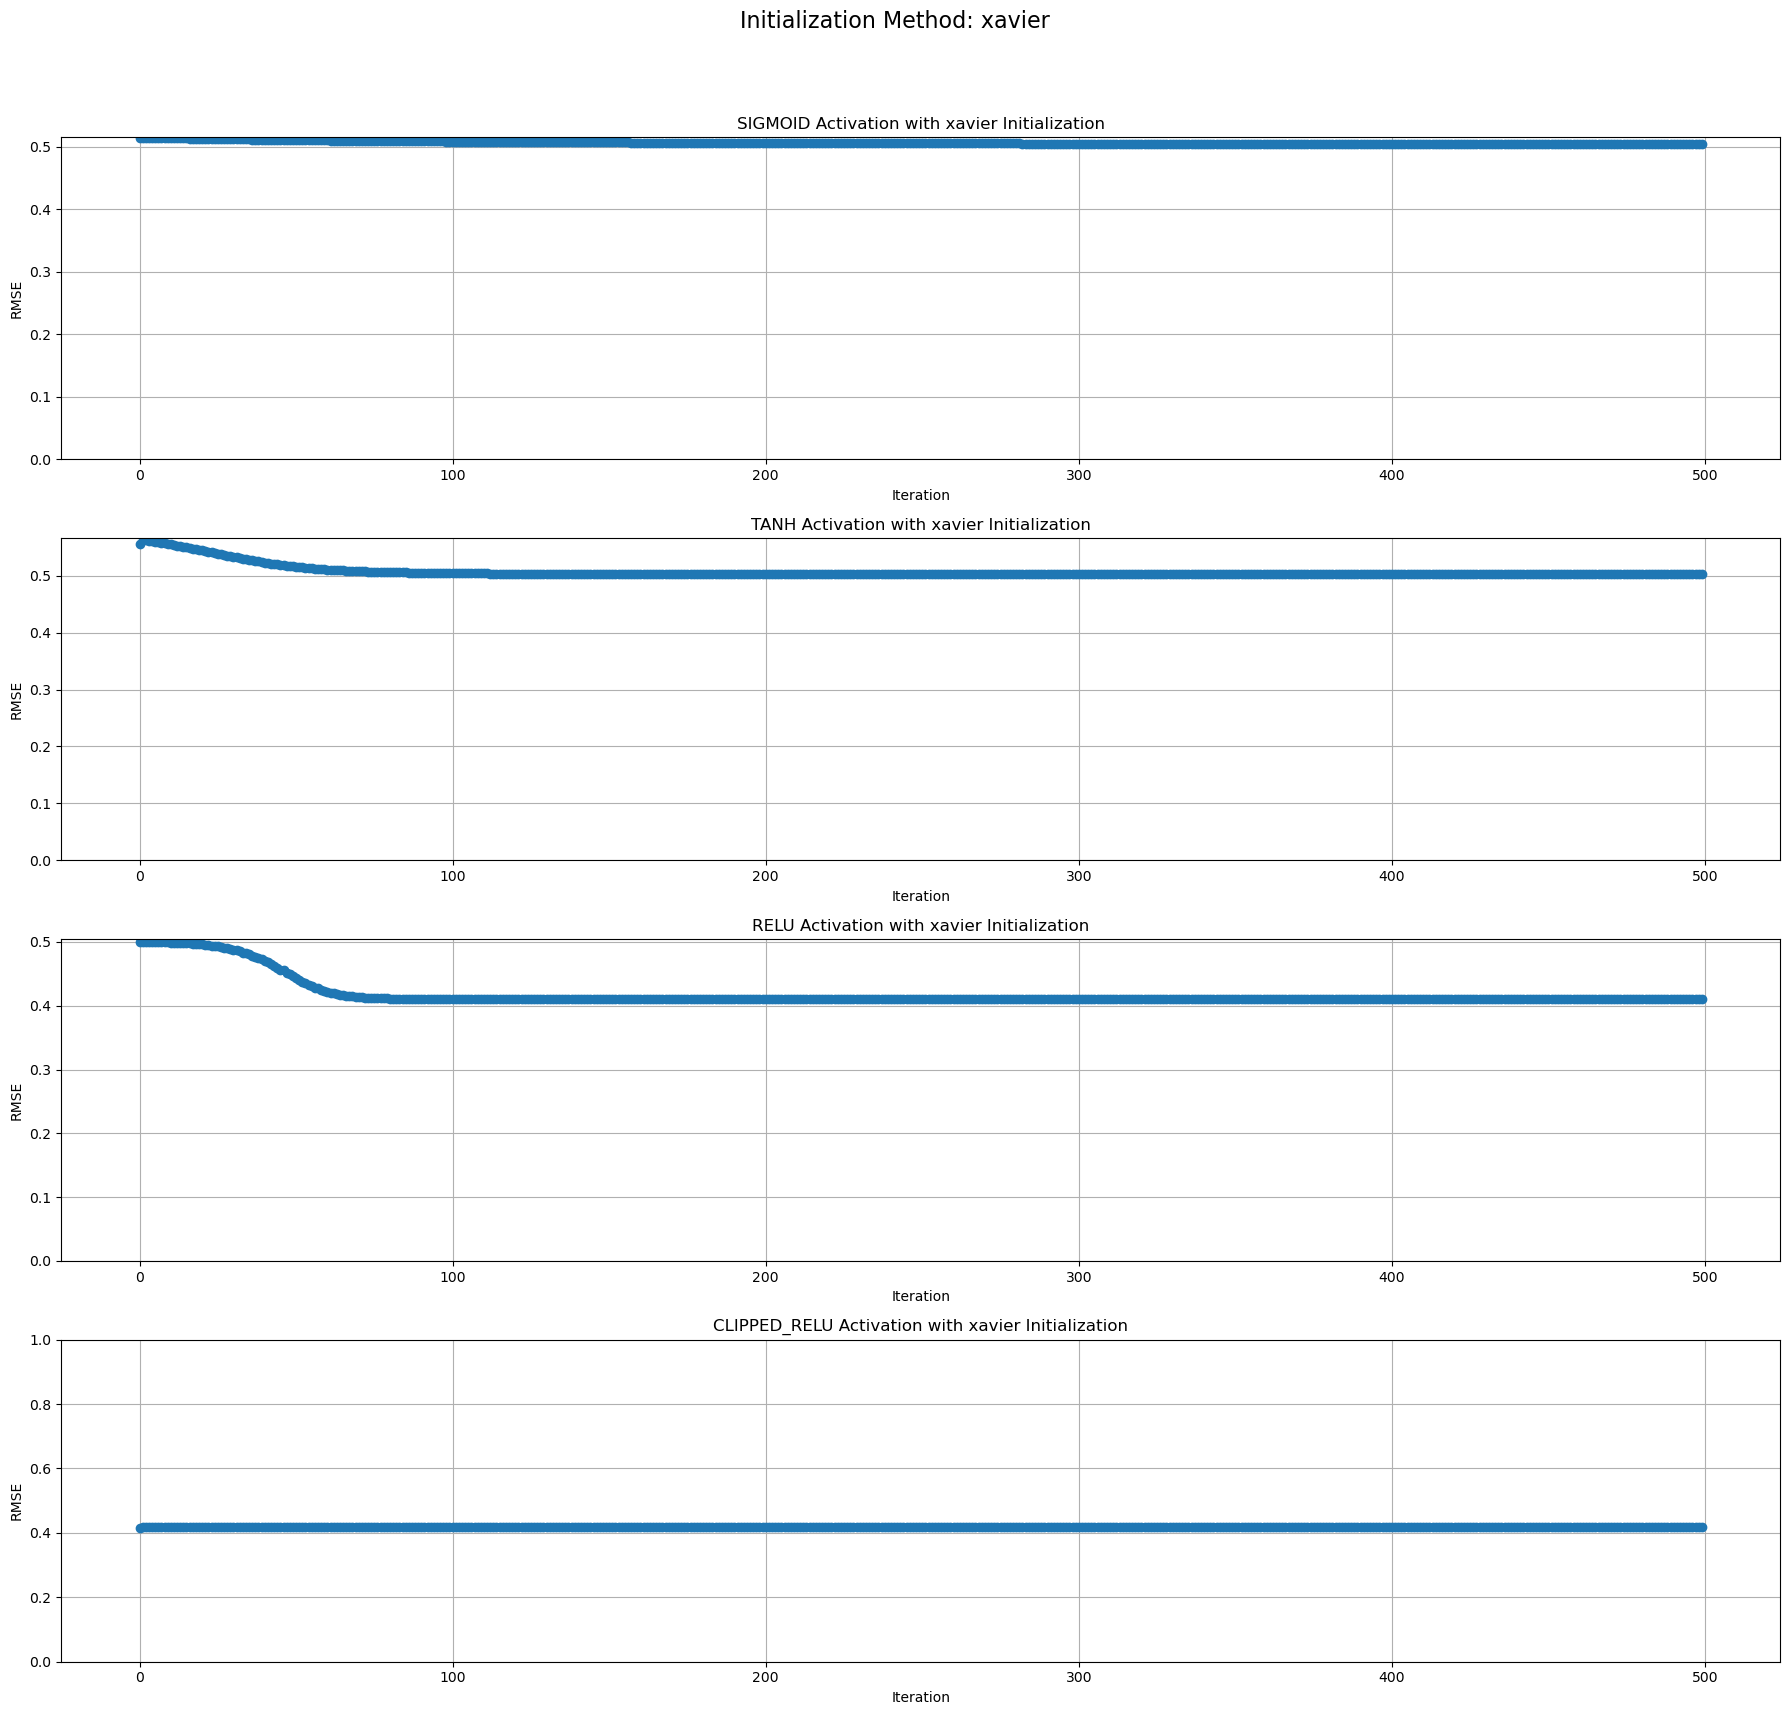

didn't
converged
didn't
didn't


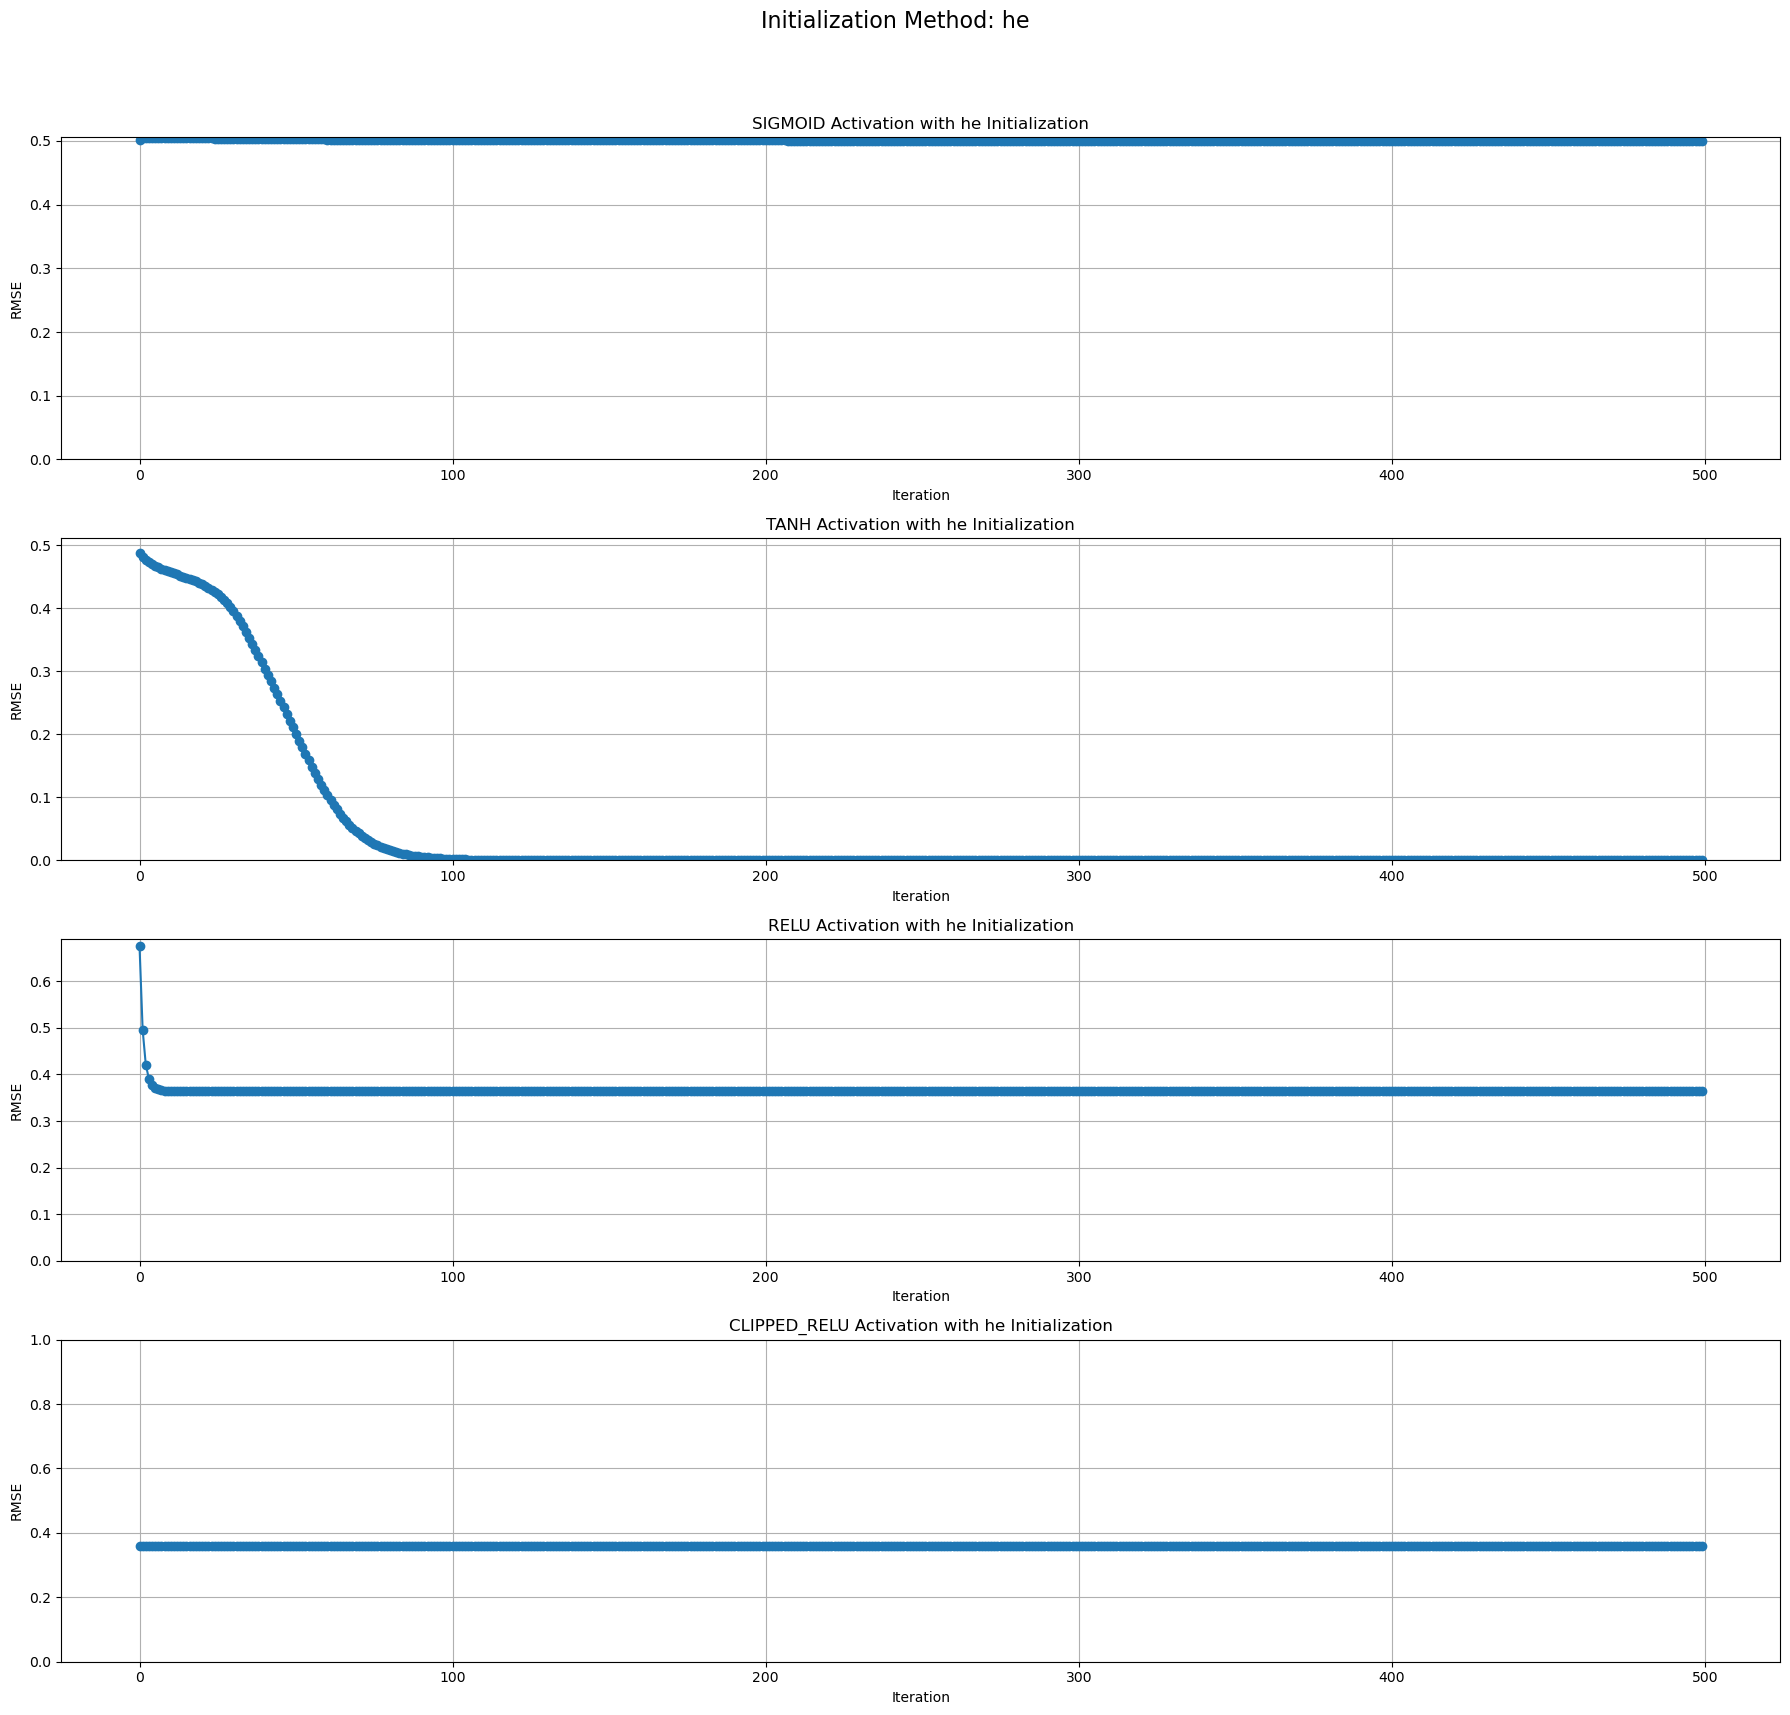

didn't
converged
converged
converged


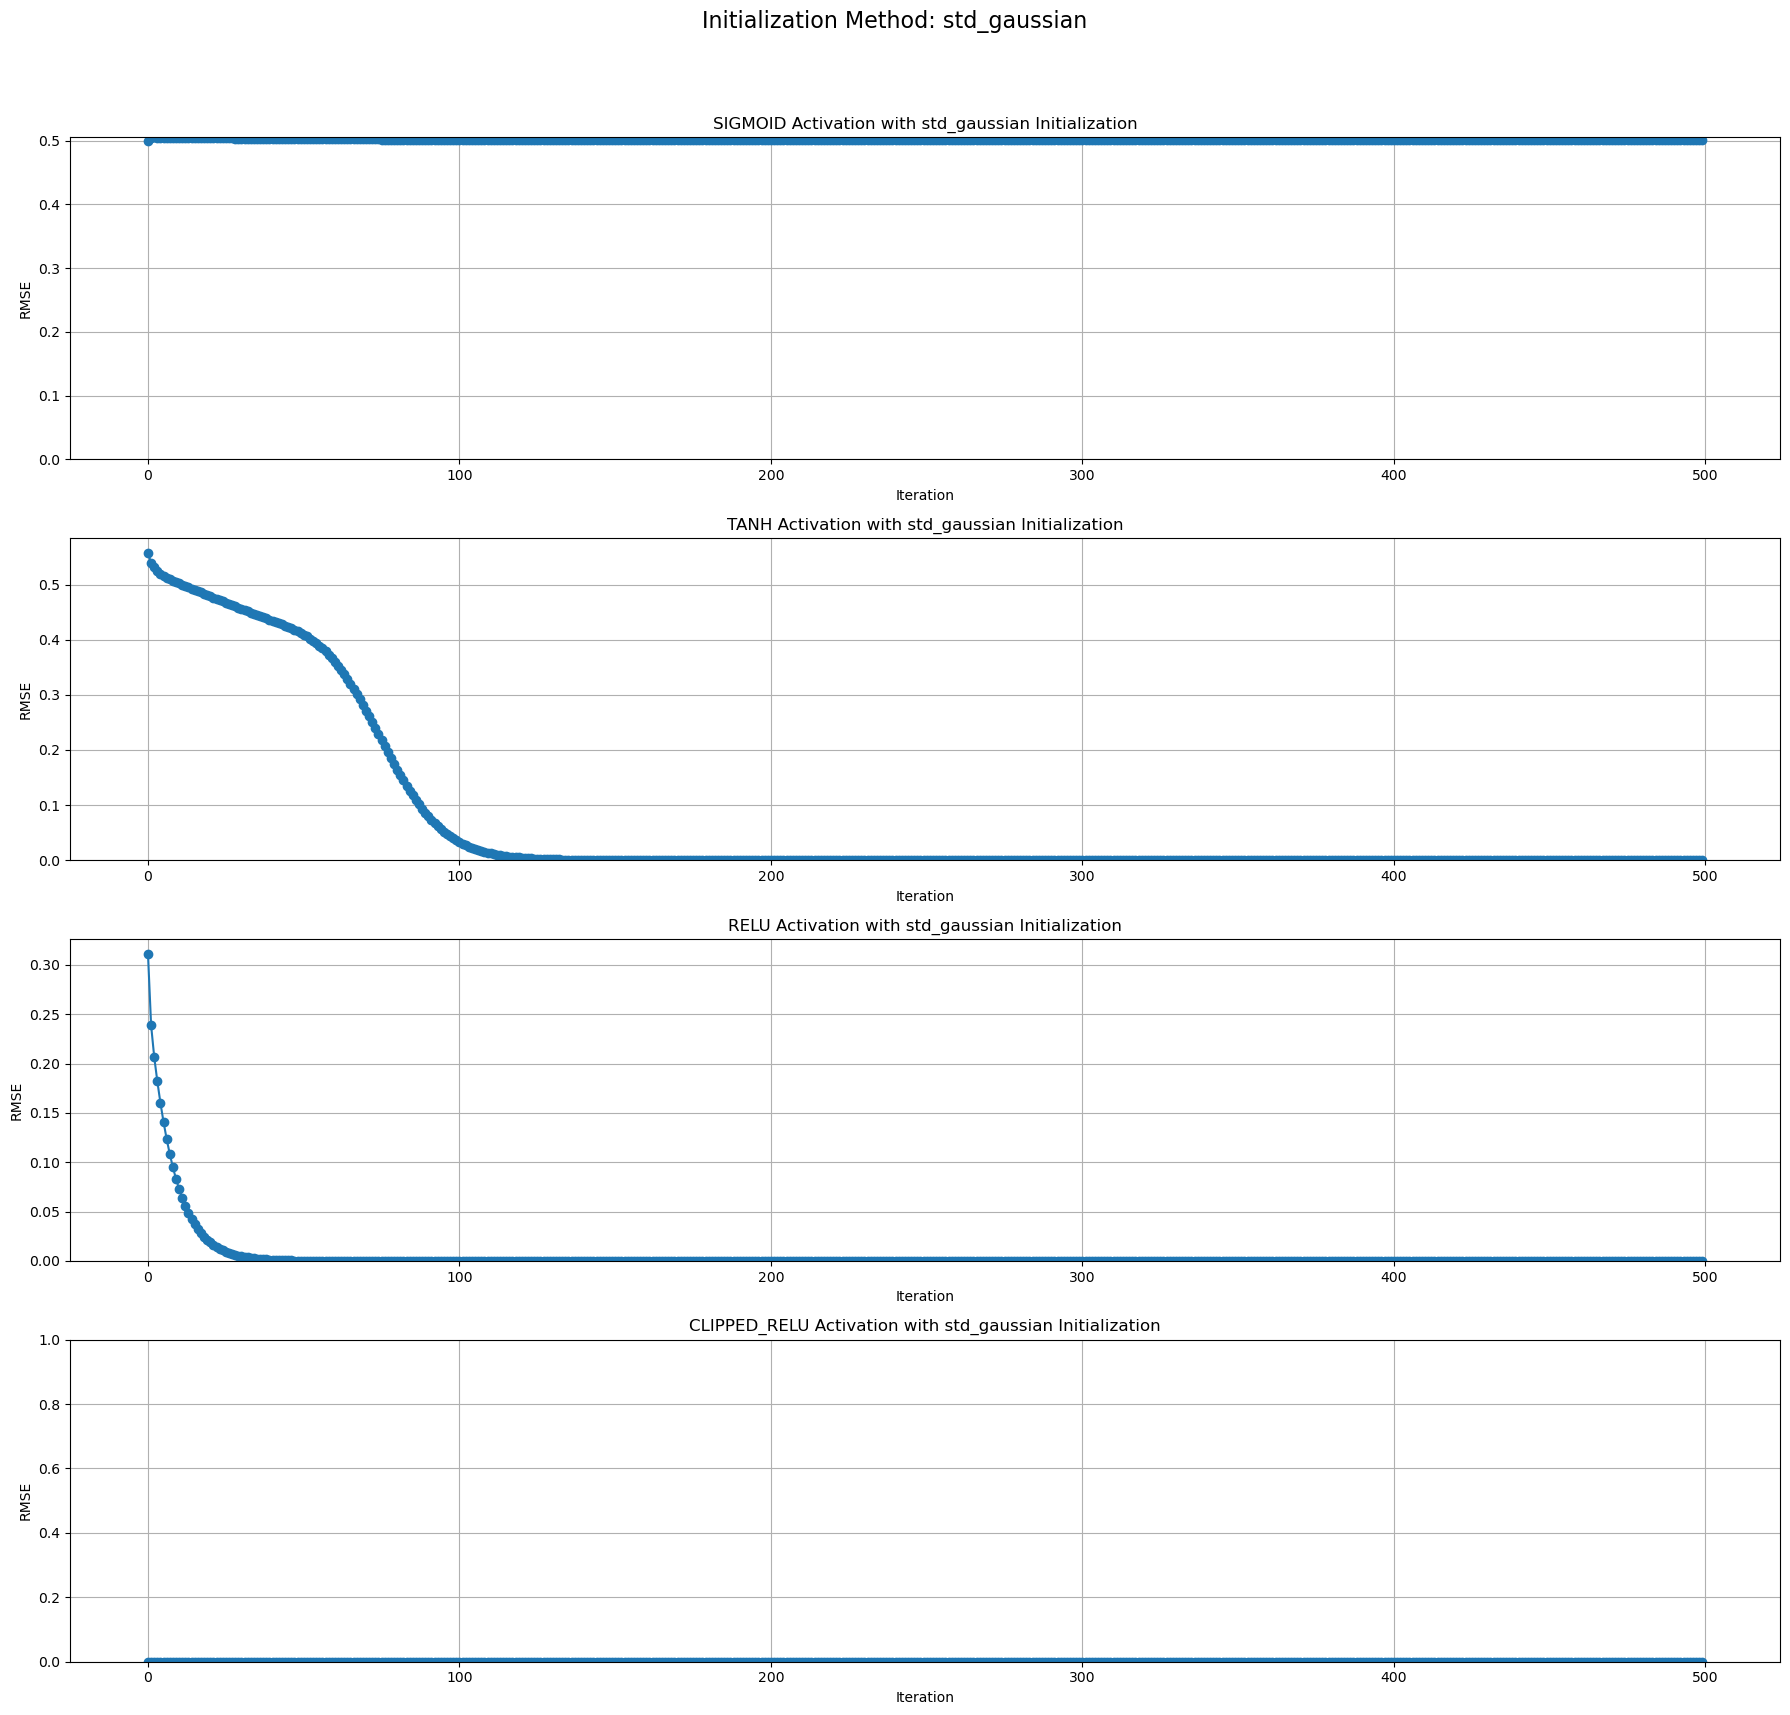

didn't
converged
converged
converged


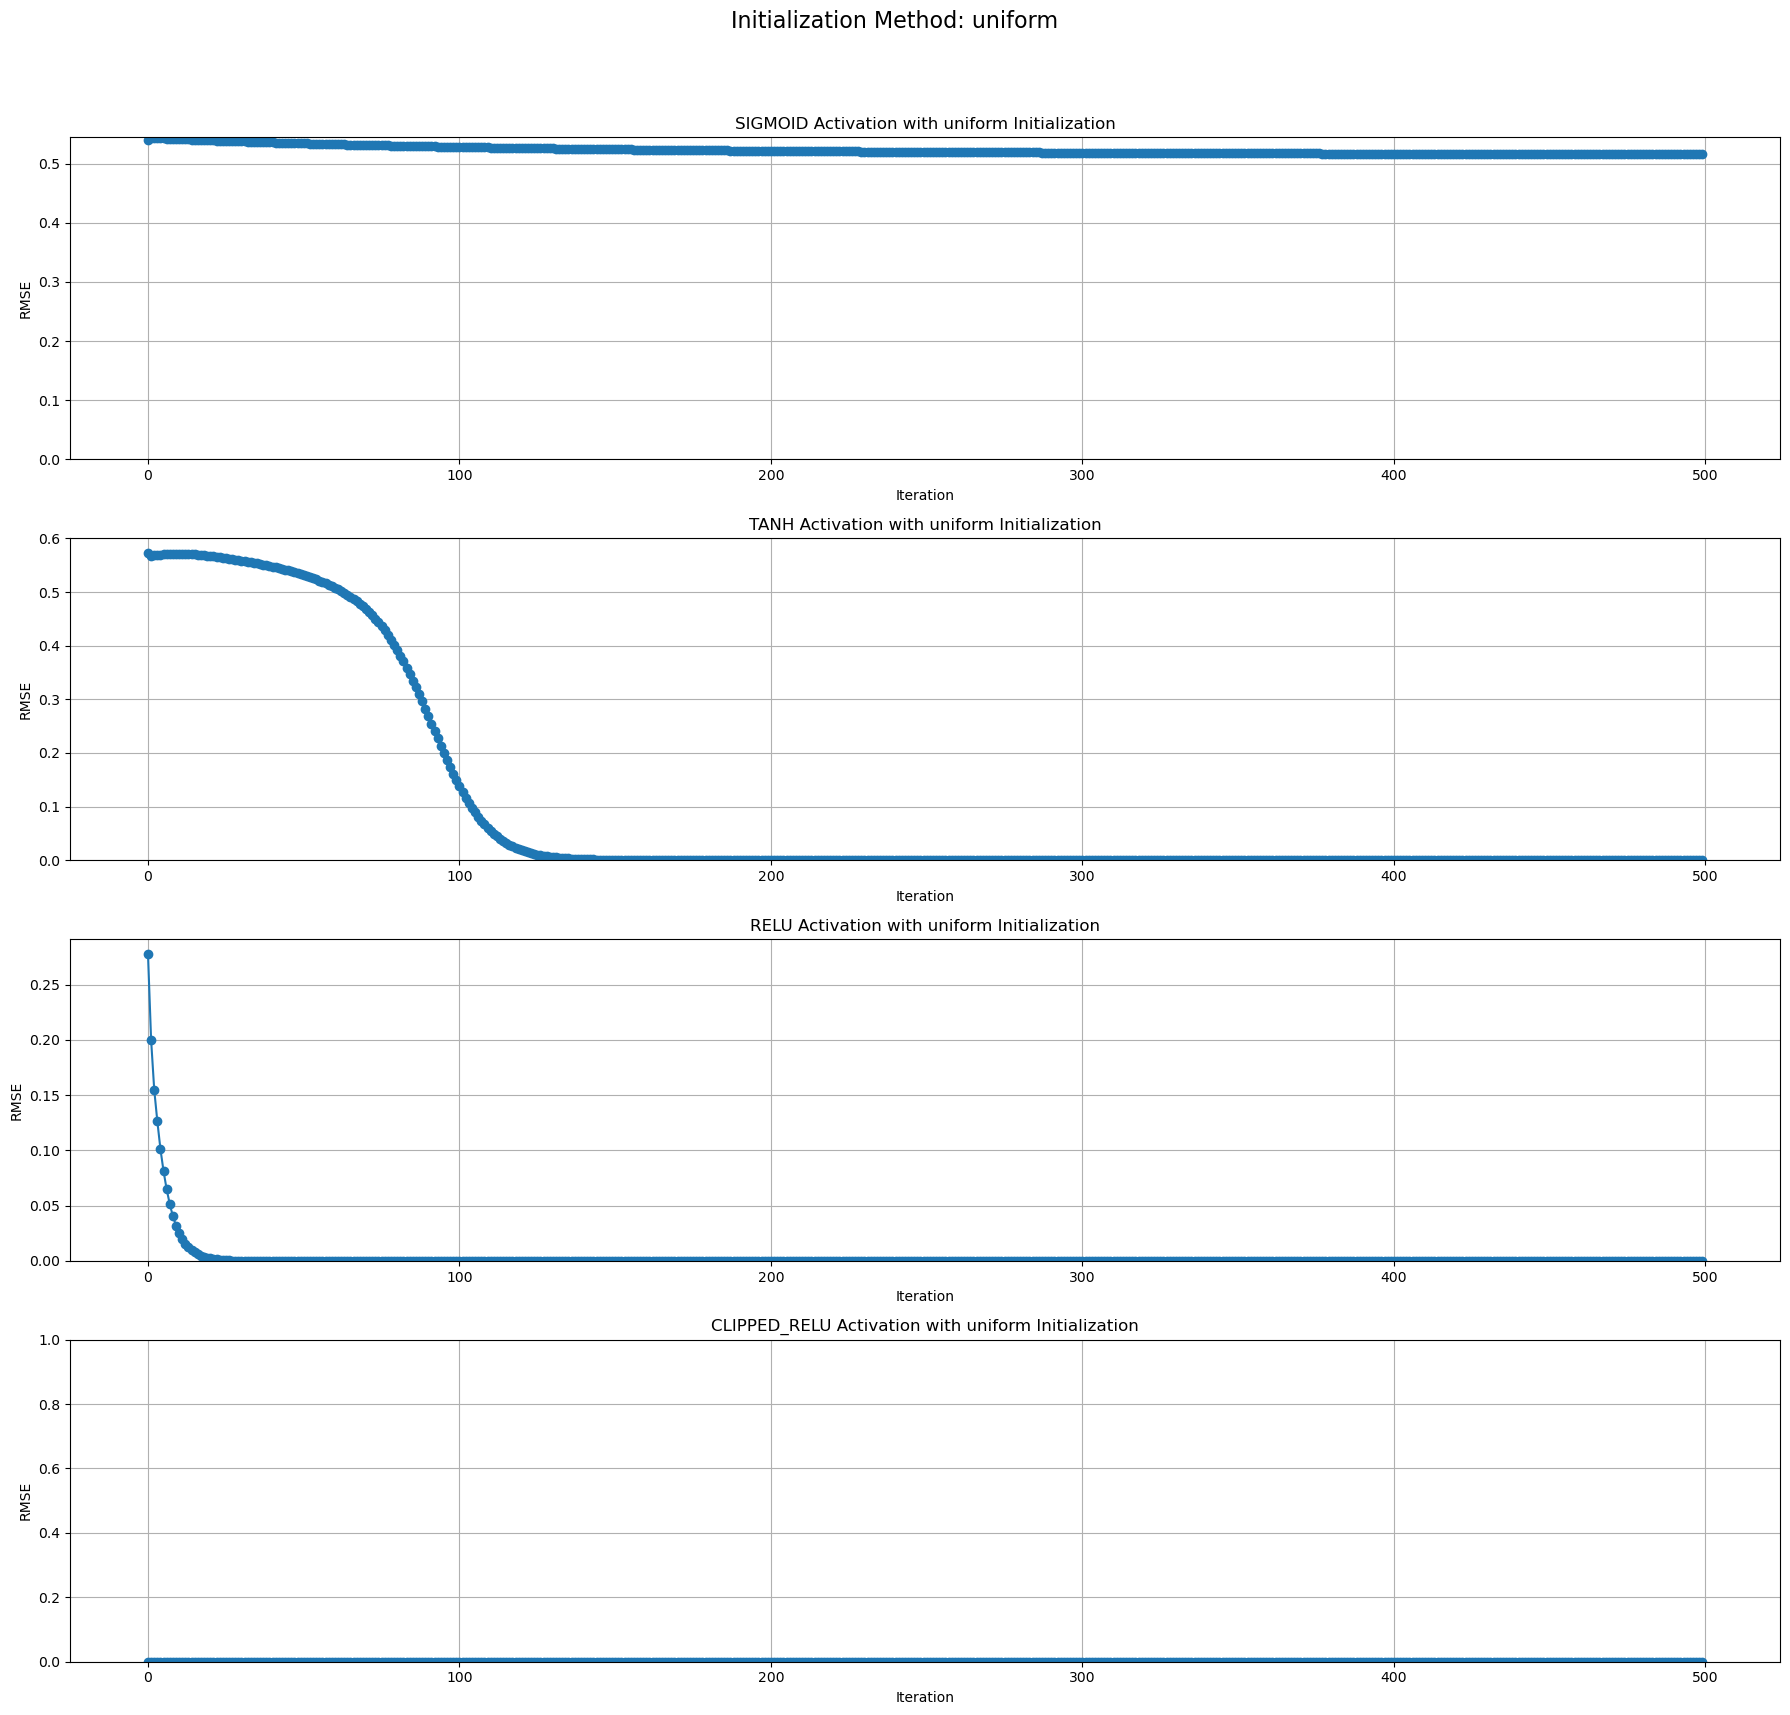

didn't
converged
converged
converged


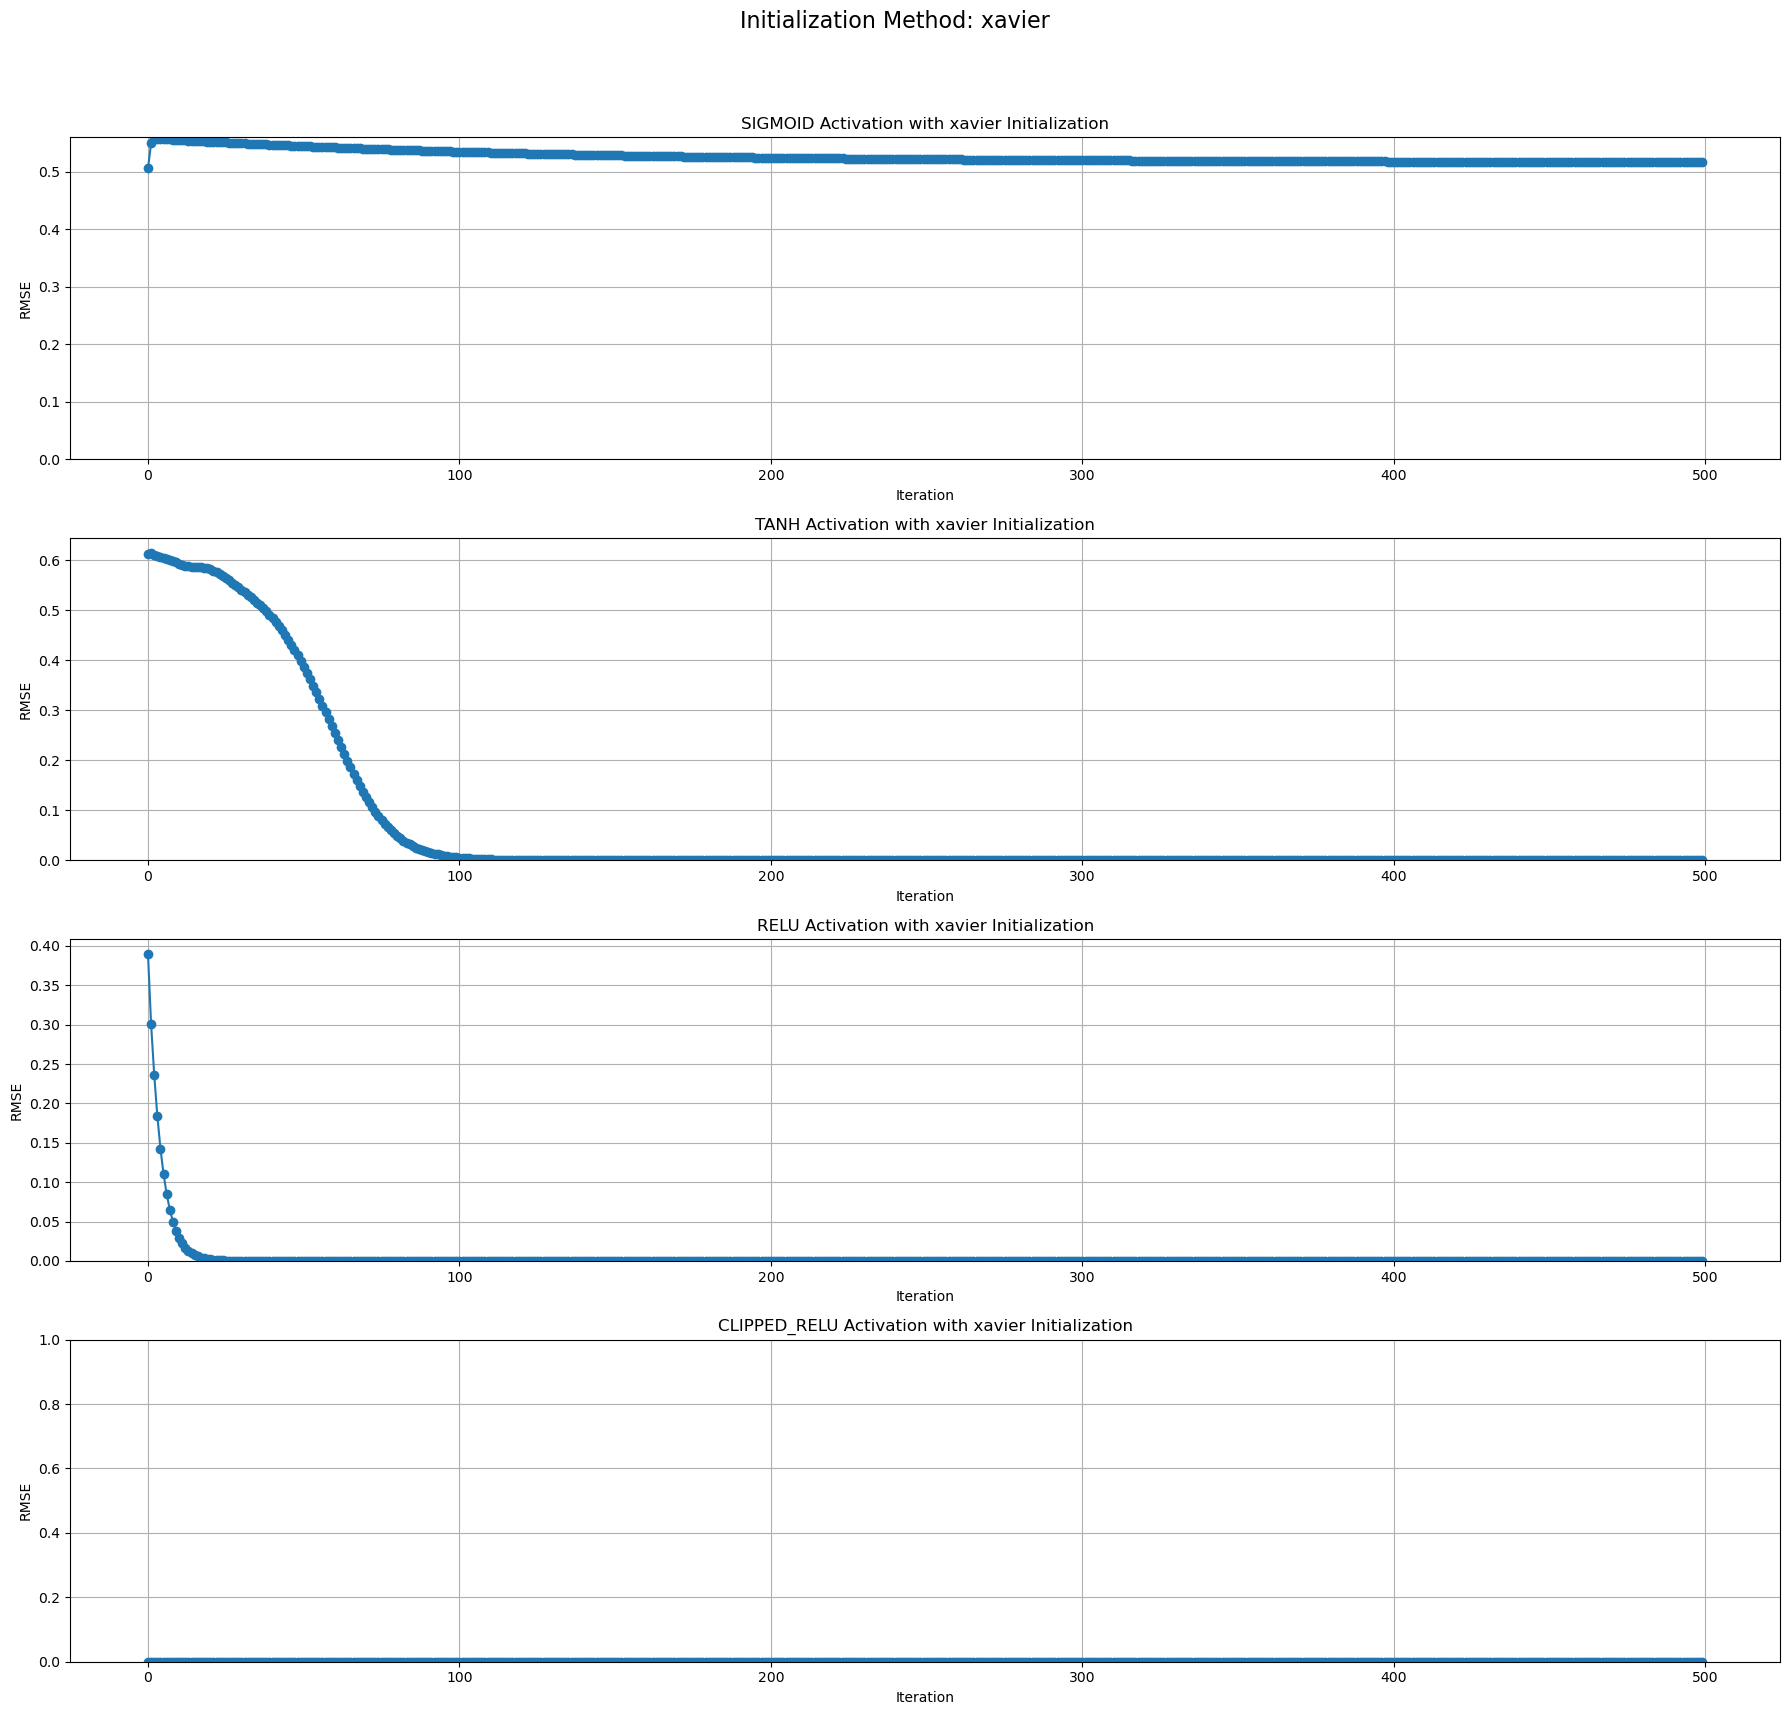

didn't
converged
didn't
didn't


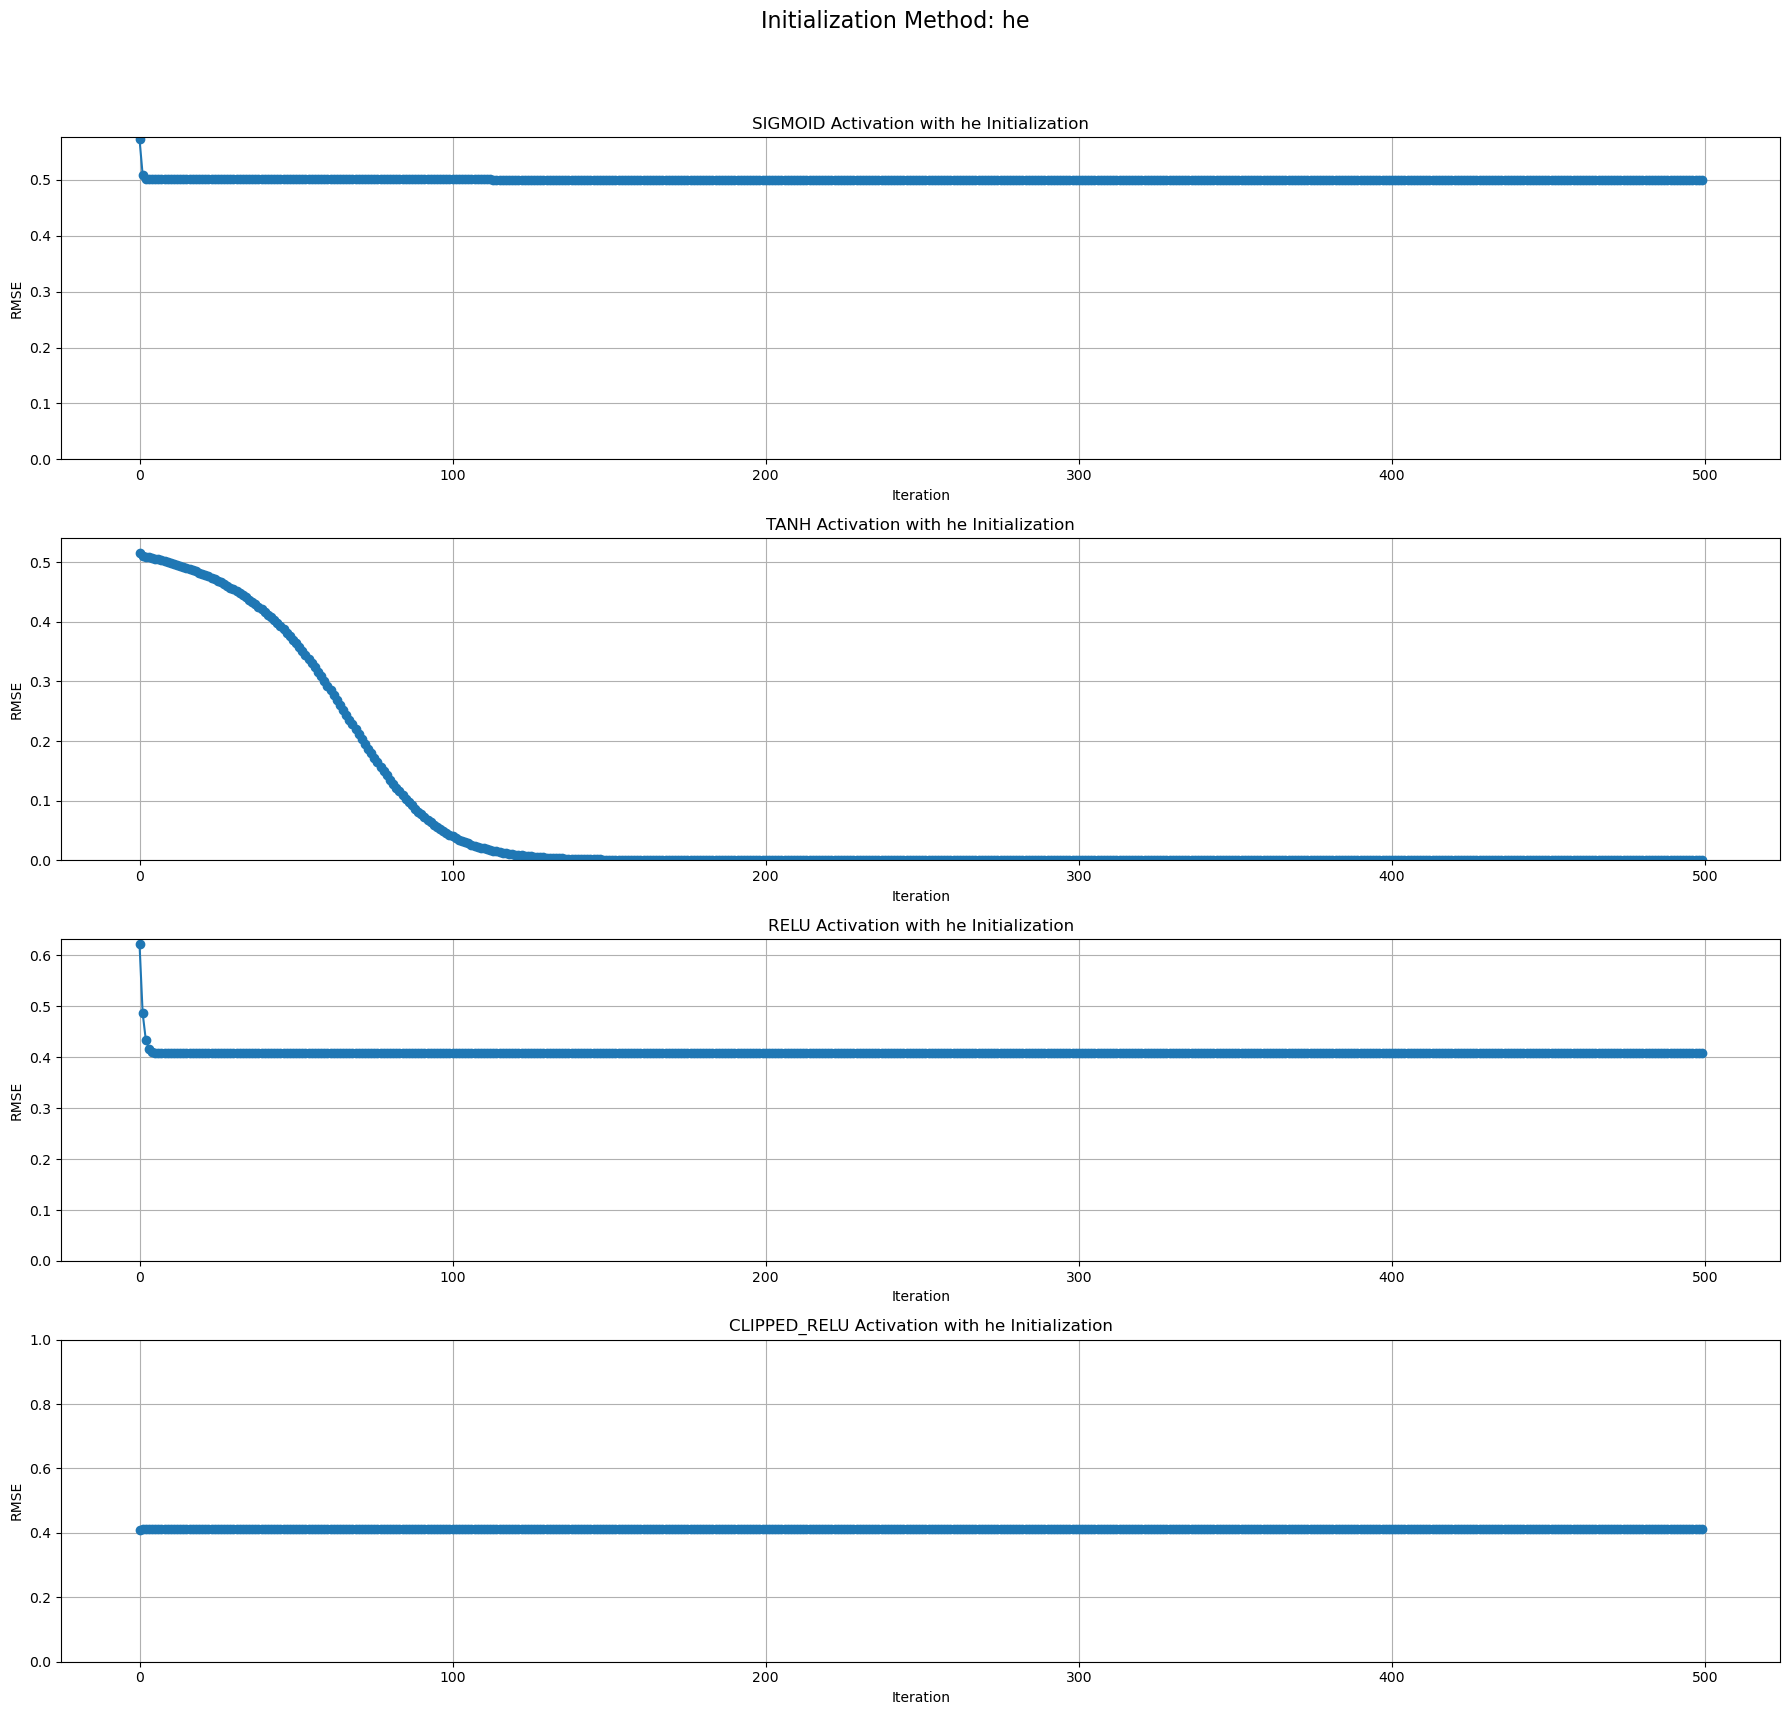

didn't
converged
converged
converged


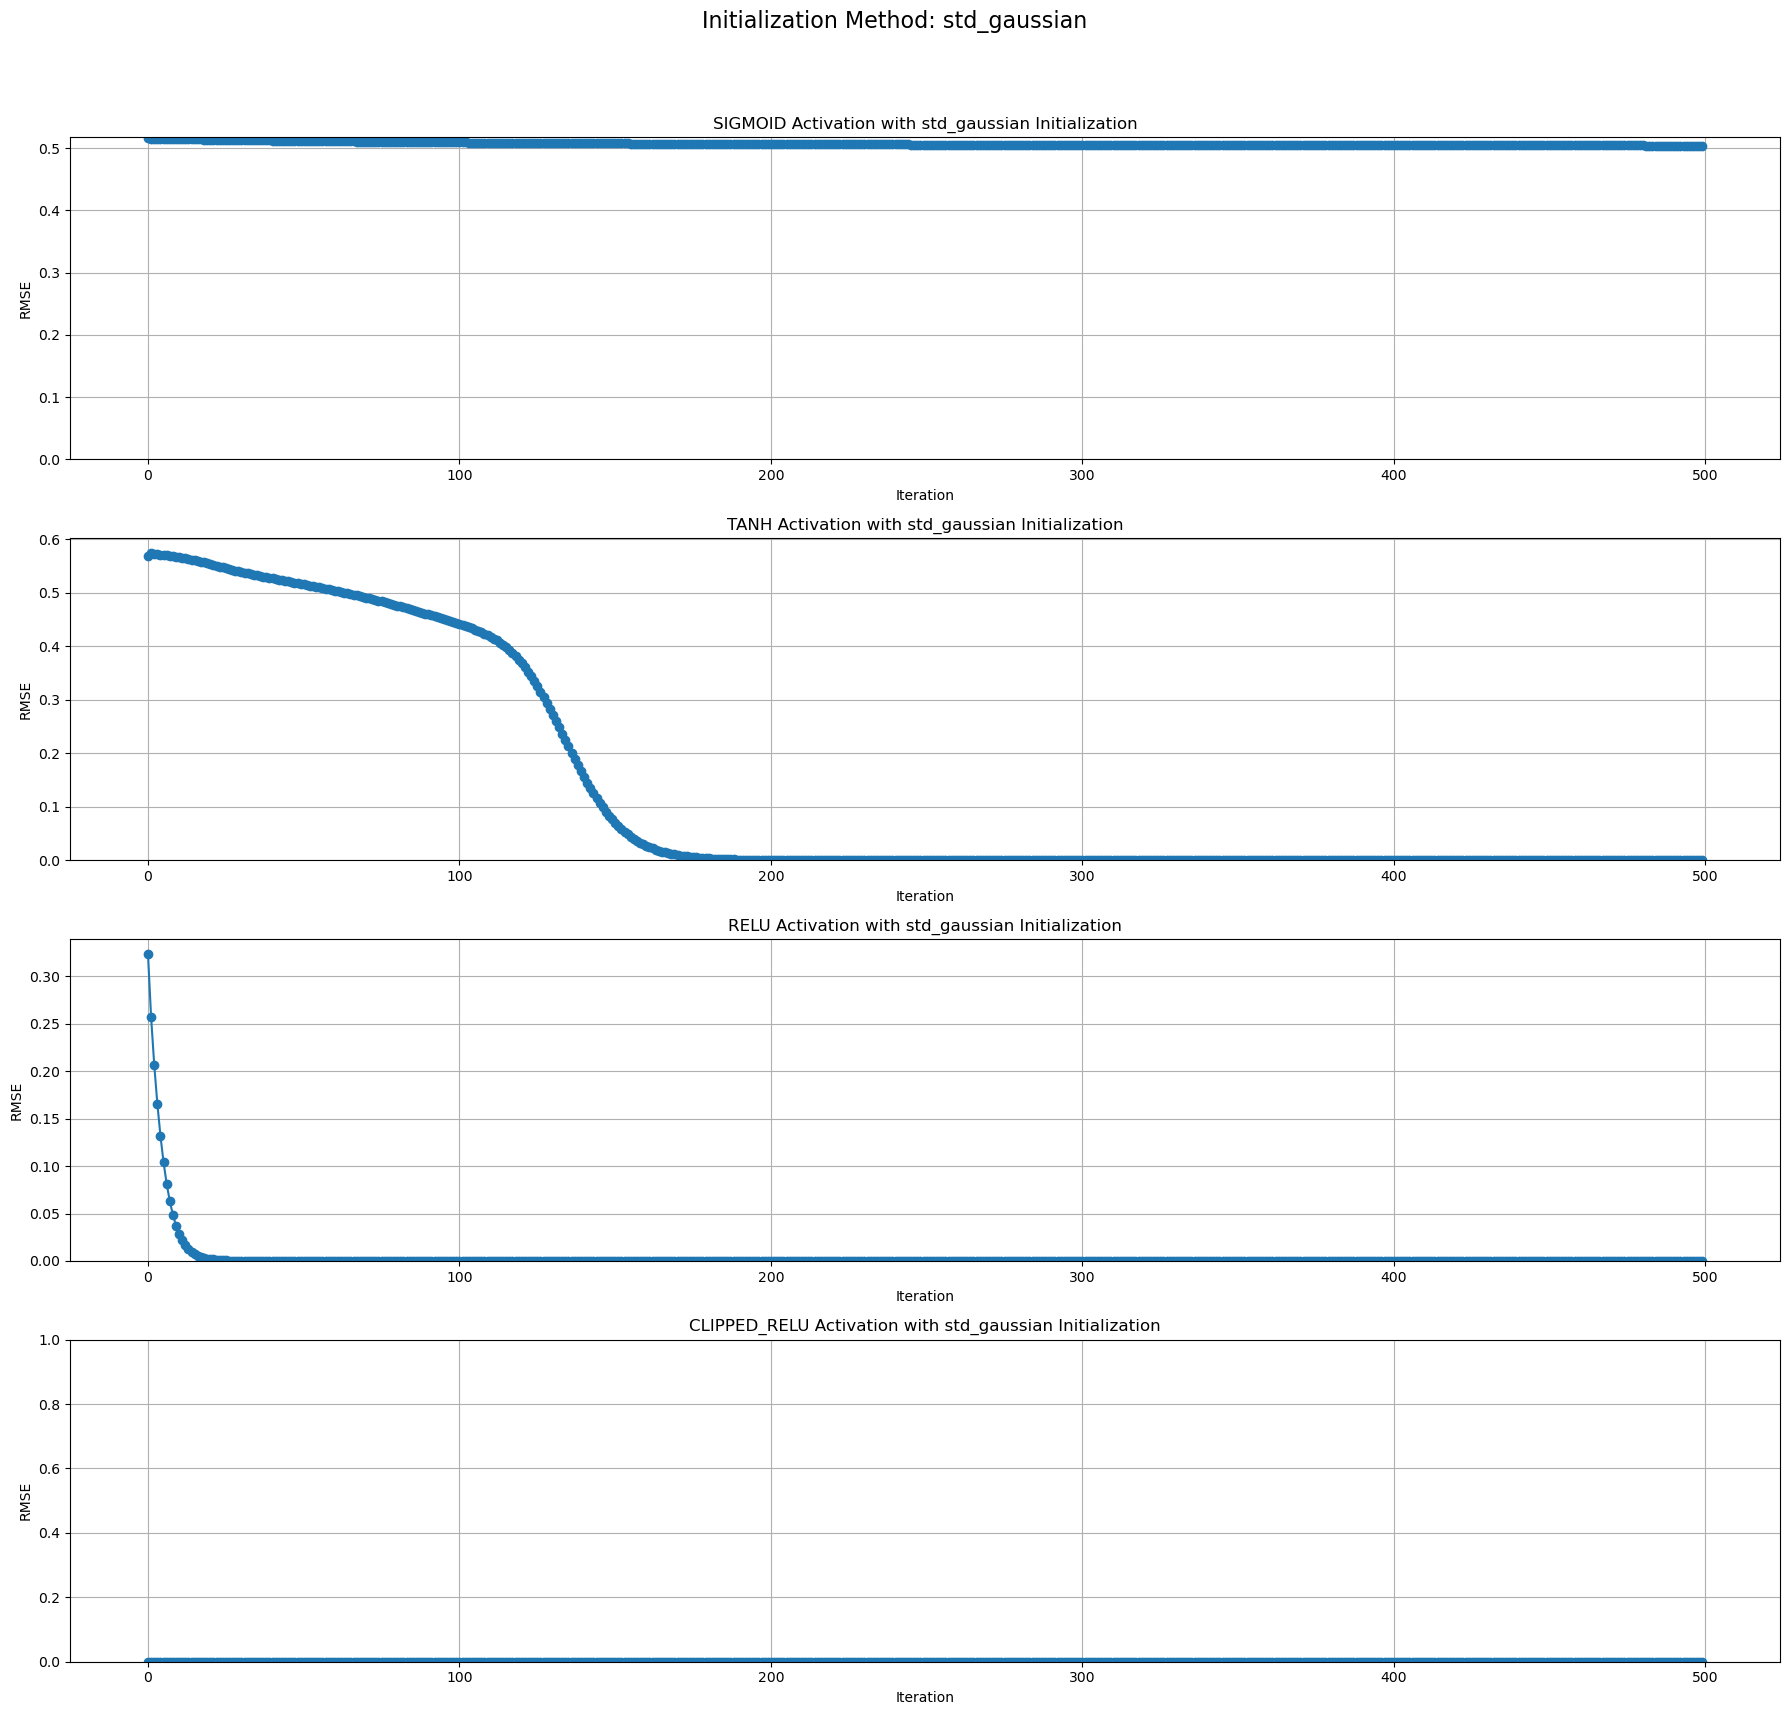

didn't
converged
converged
converged


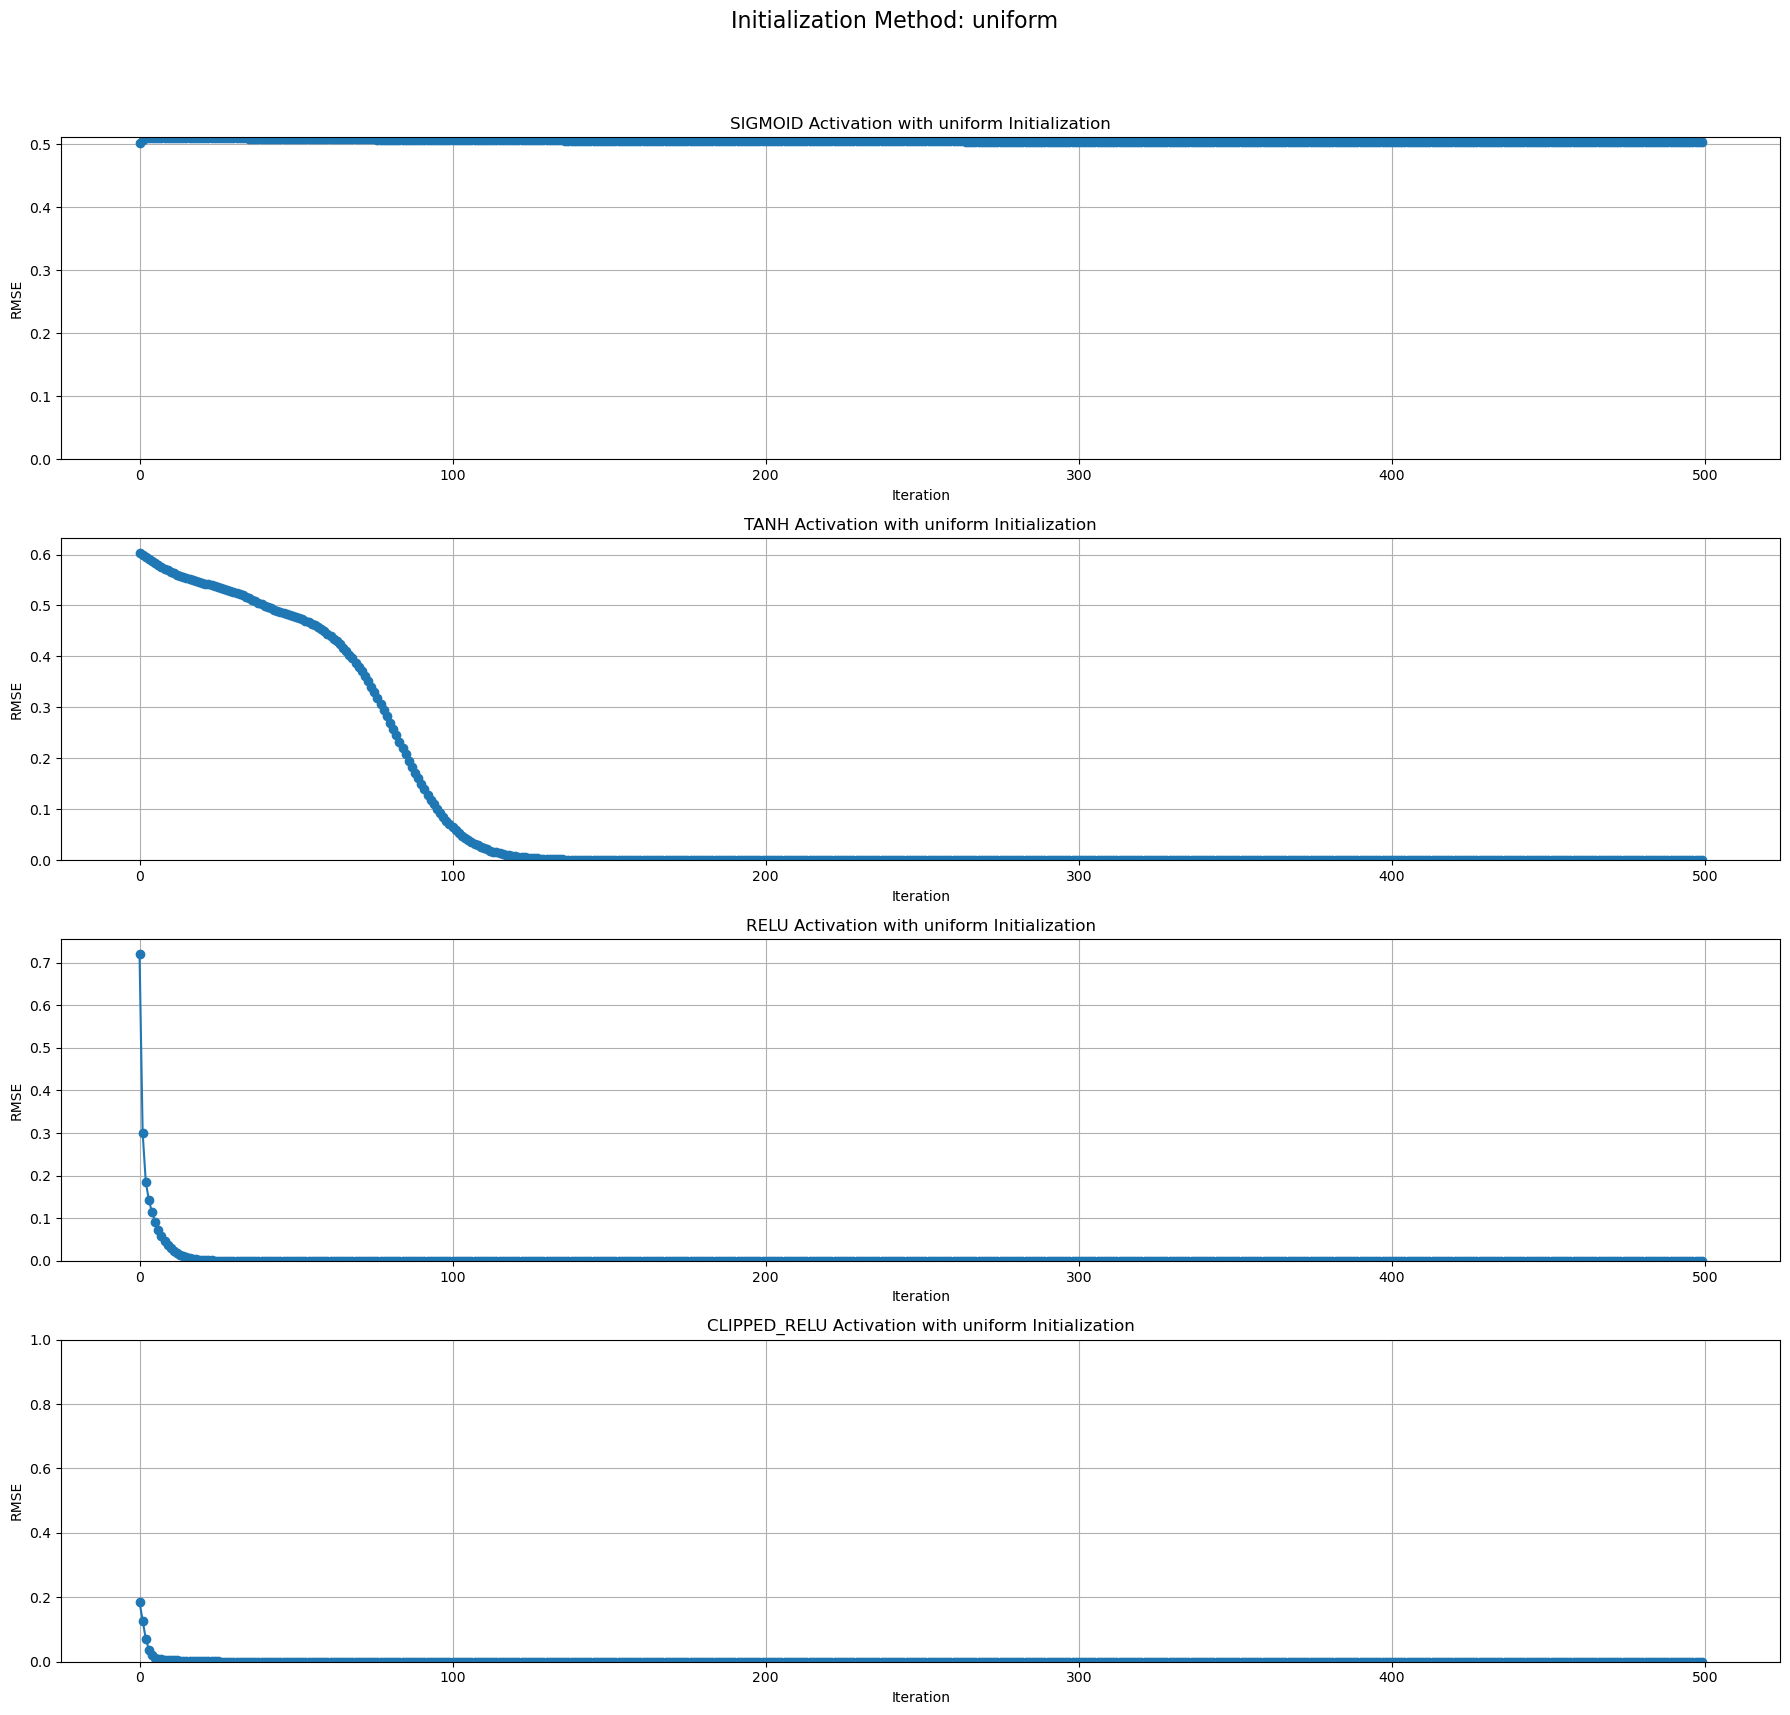

didn't
converged
converged
converged


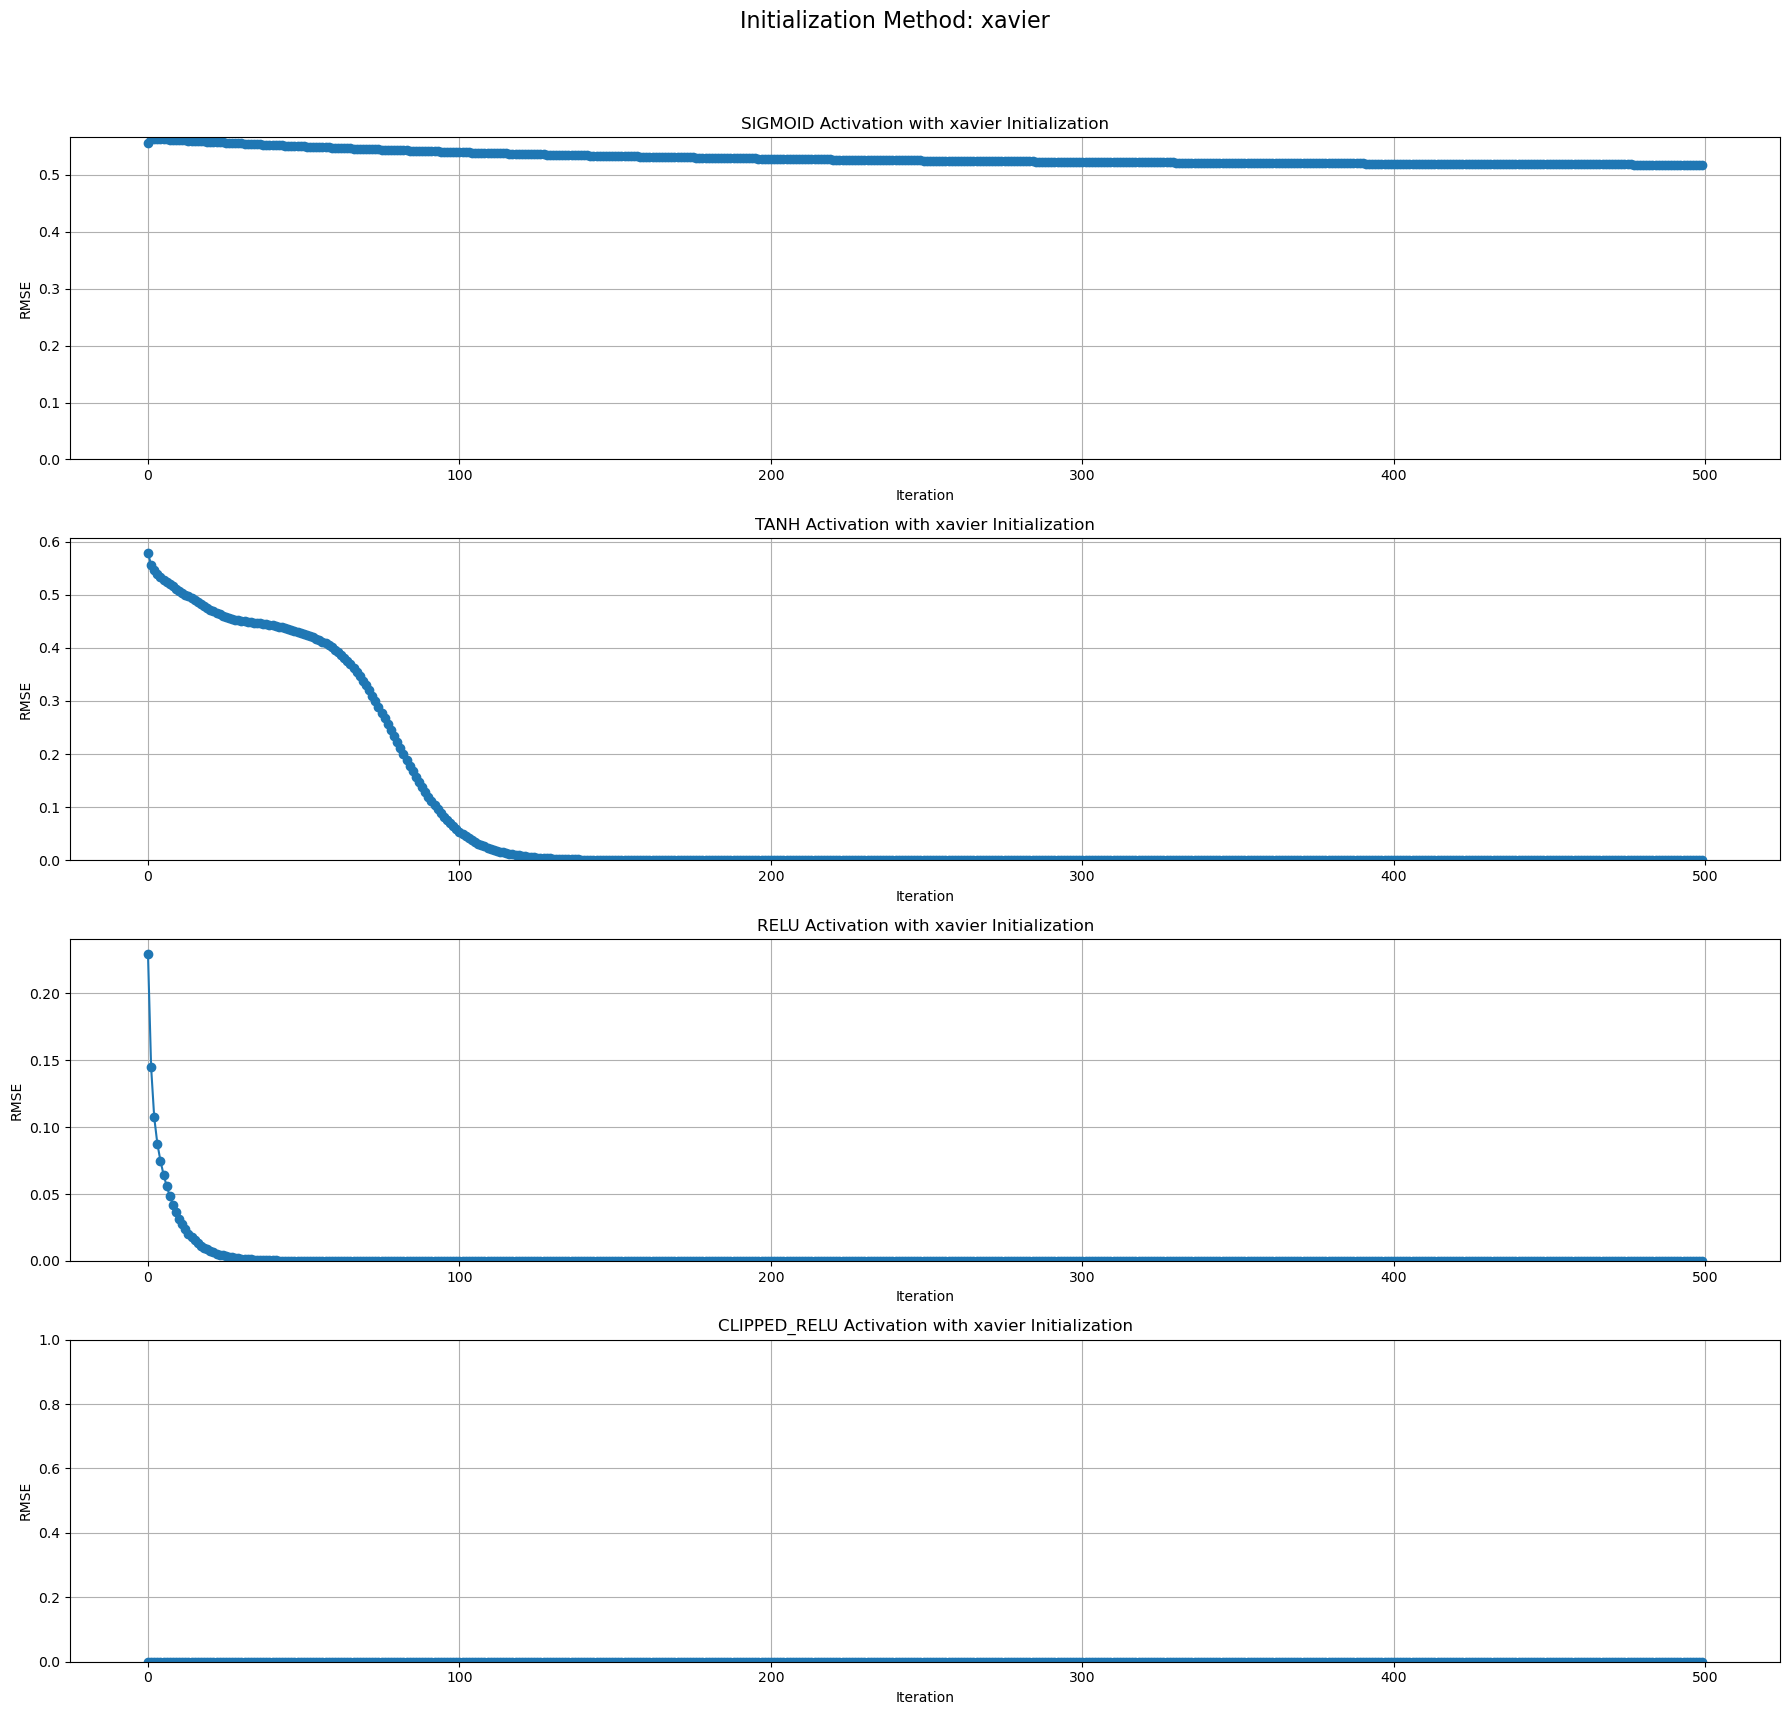

didn't
converged
didn't
didn't


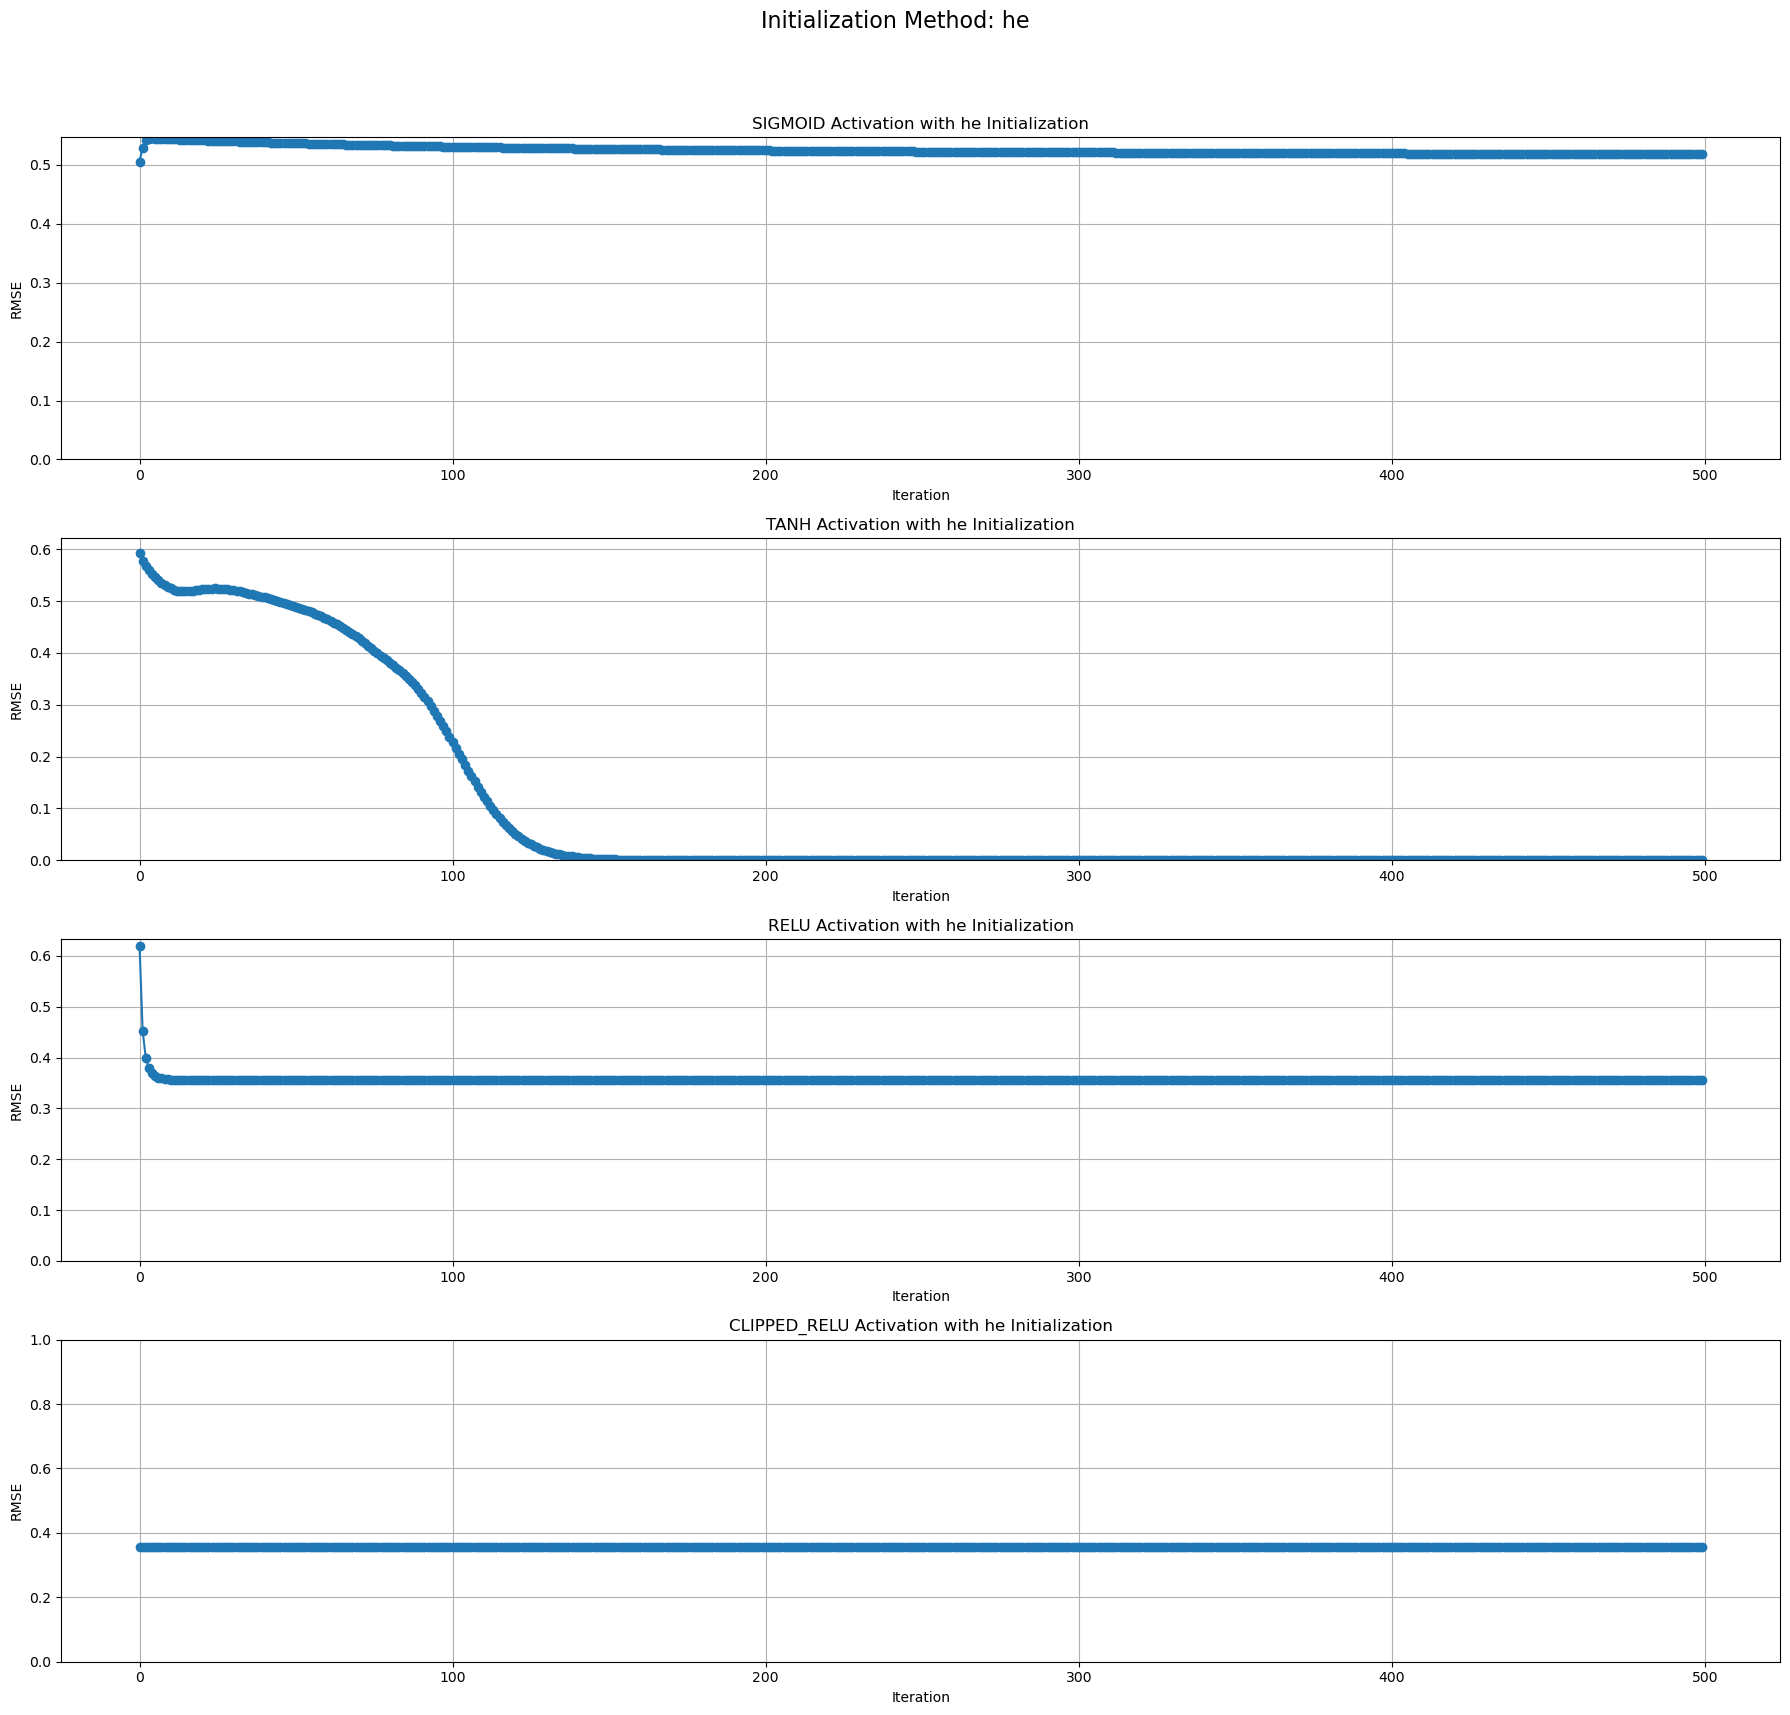

didn't
converged
didn't
didn't


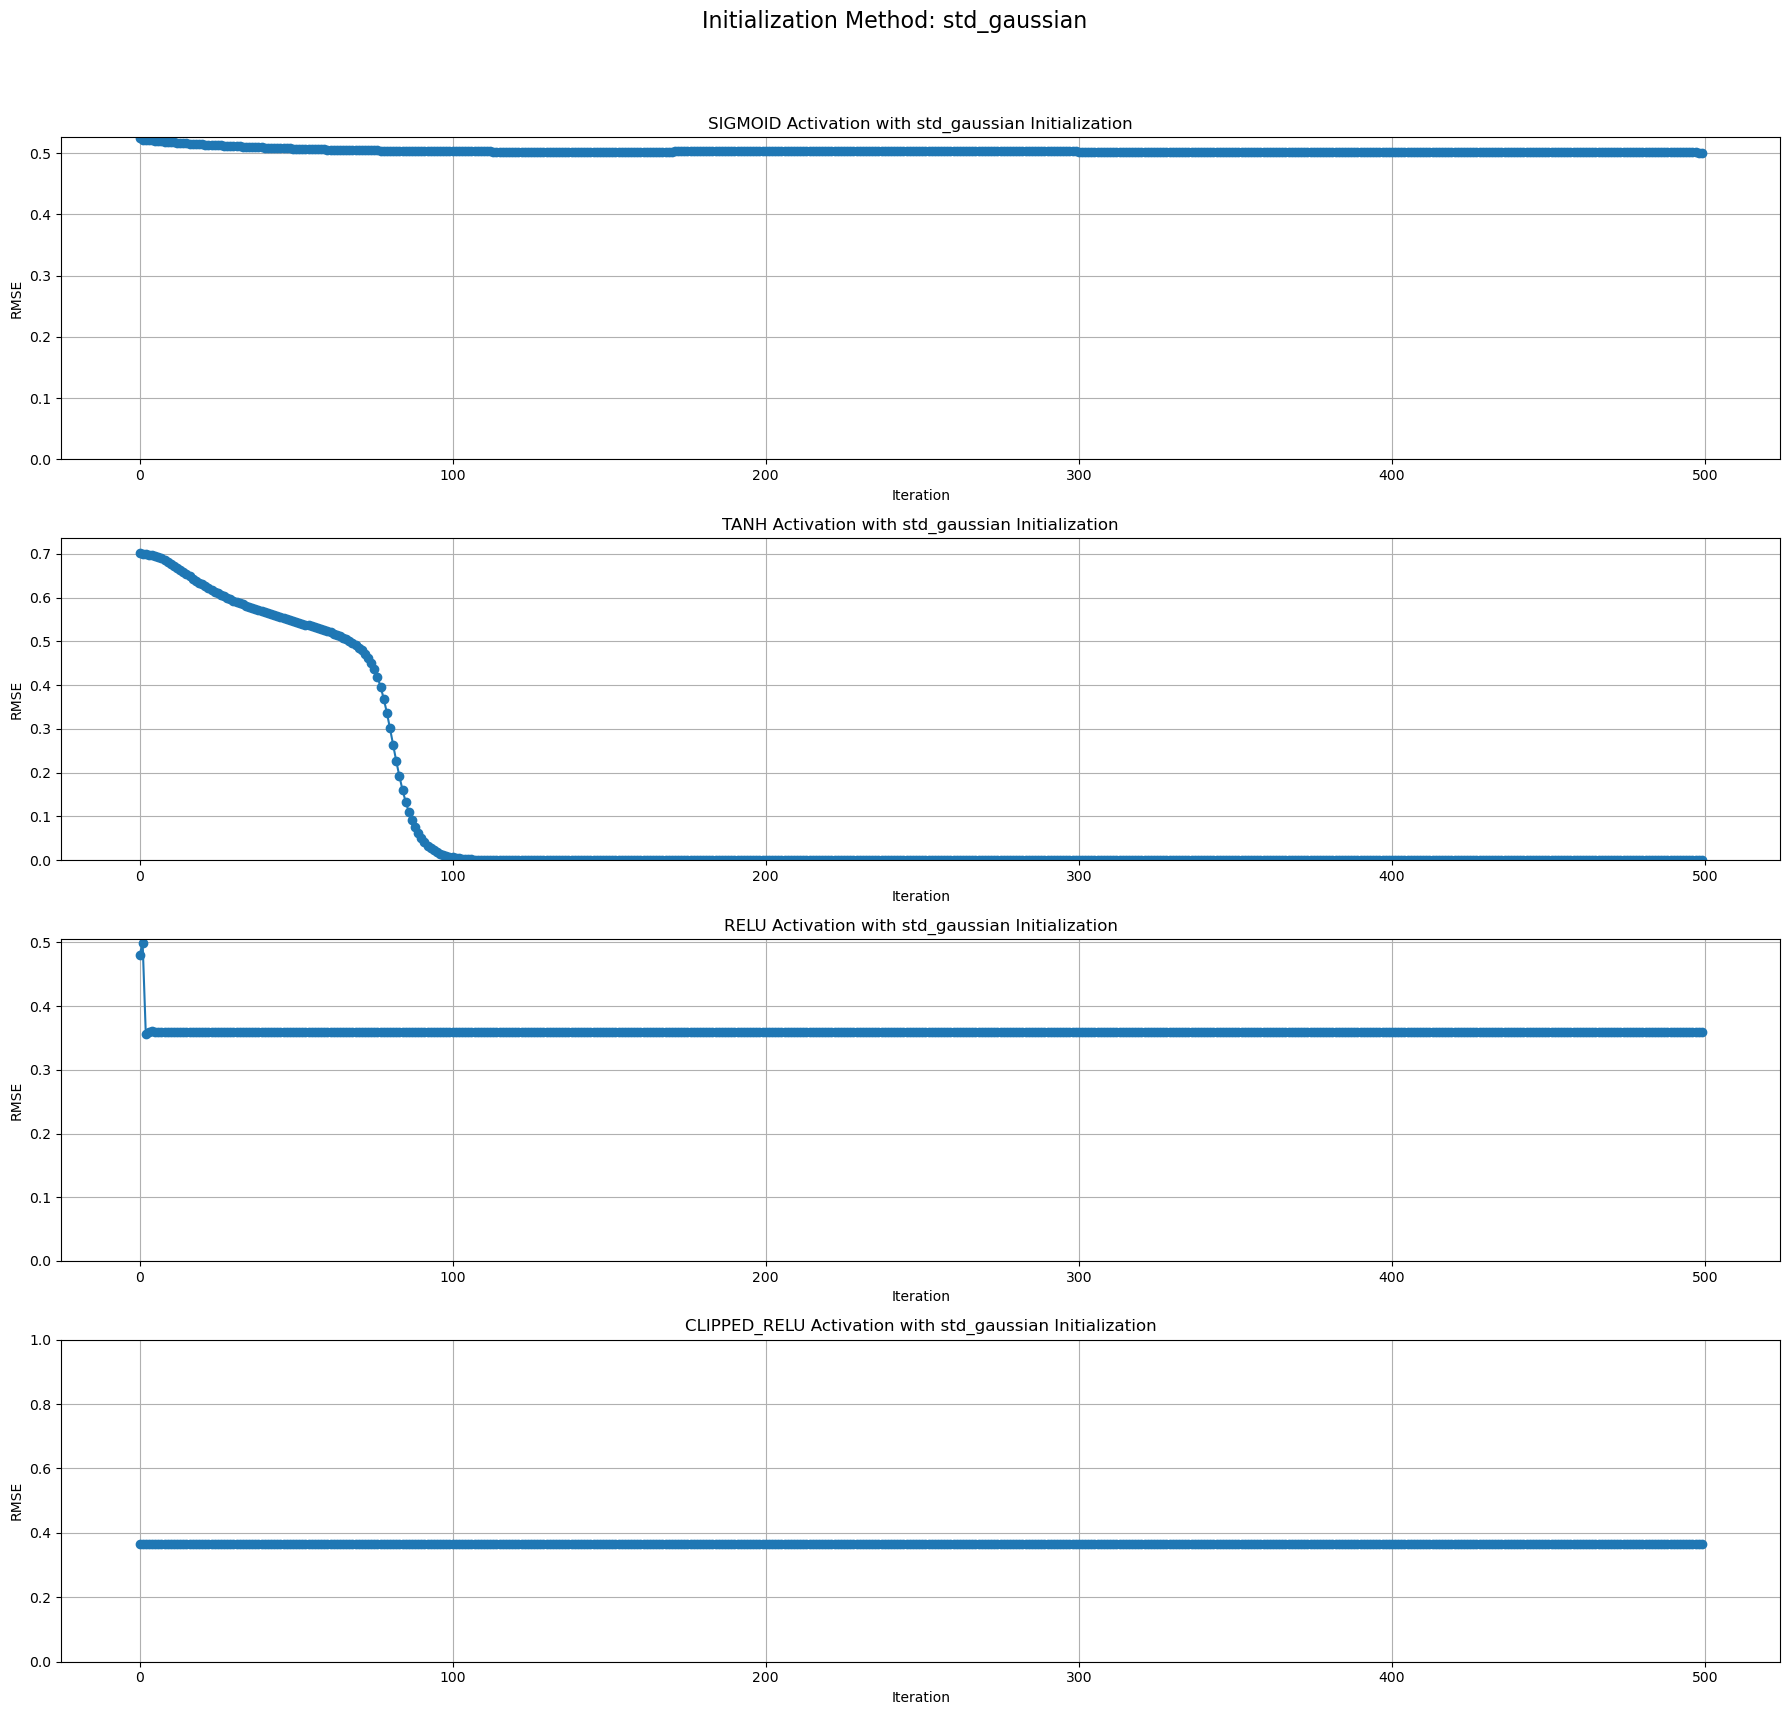

didn't
converged
converged
converged


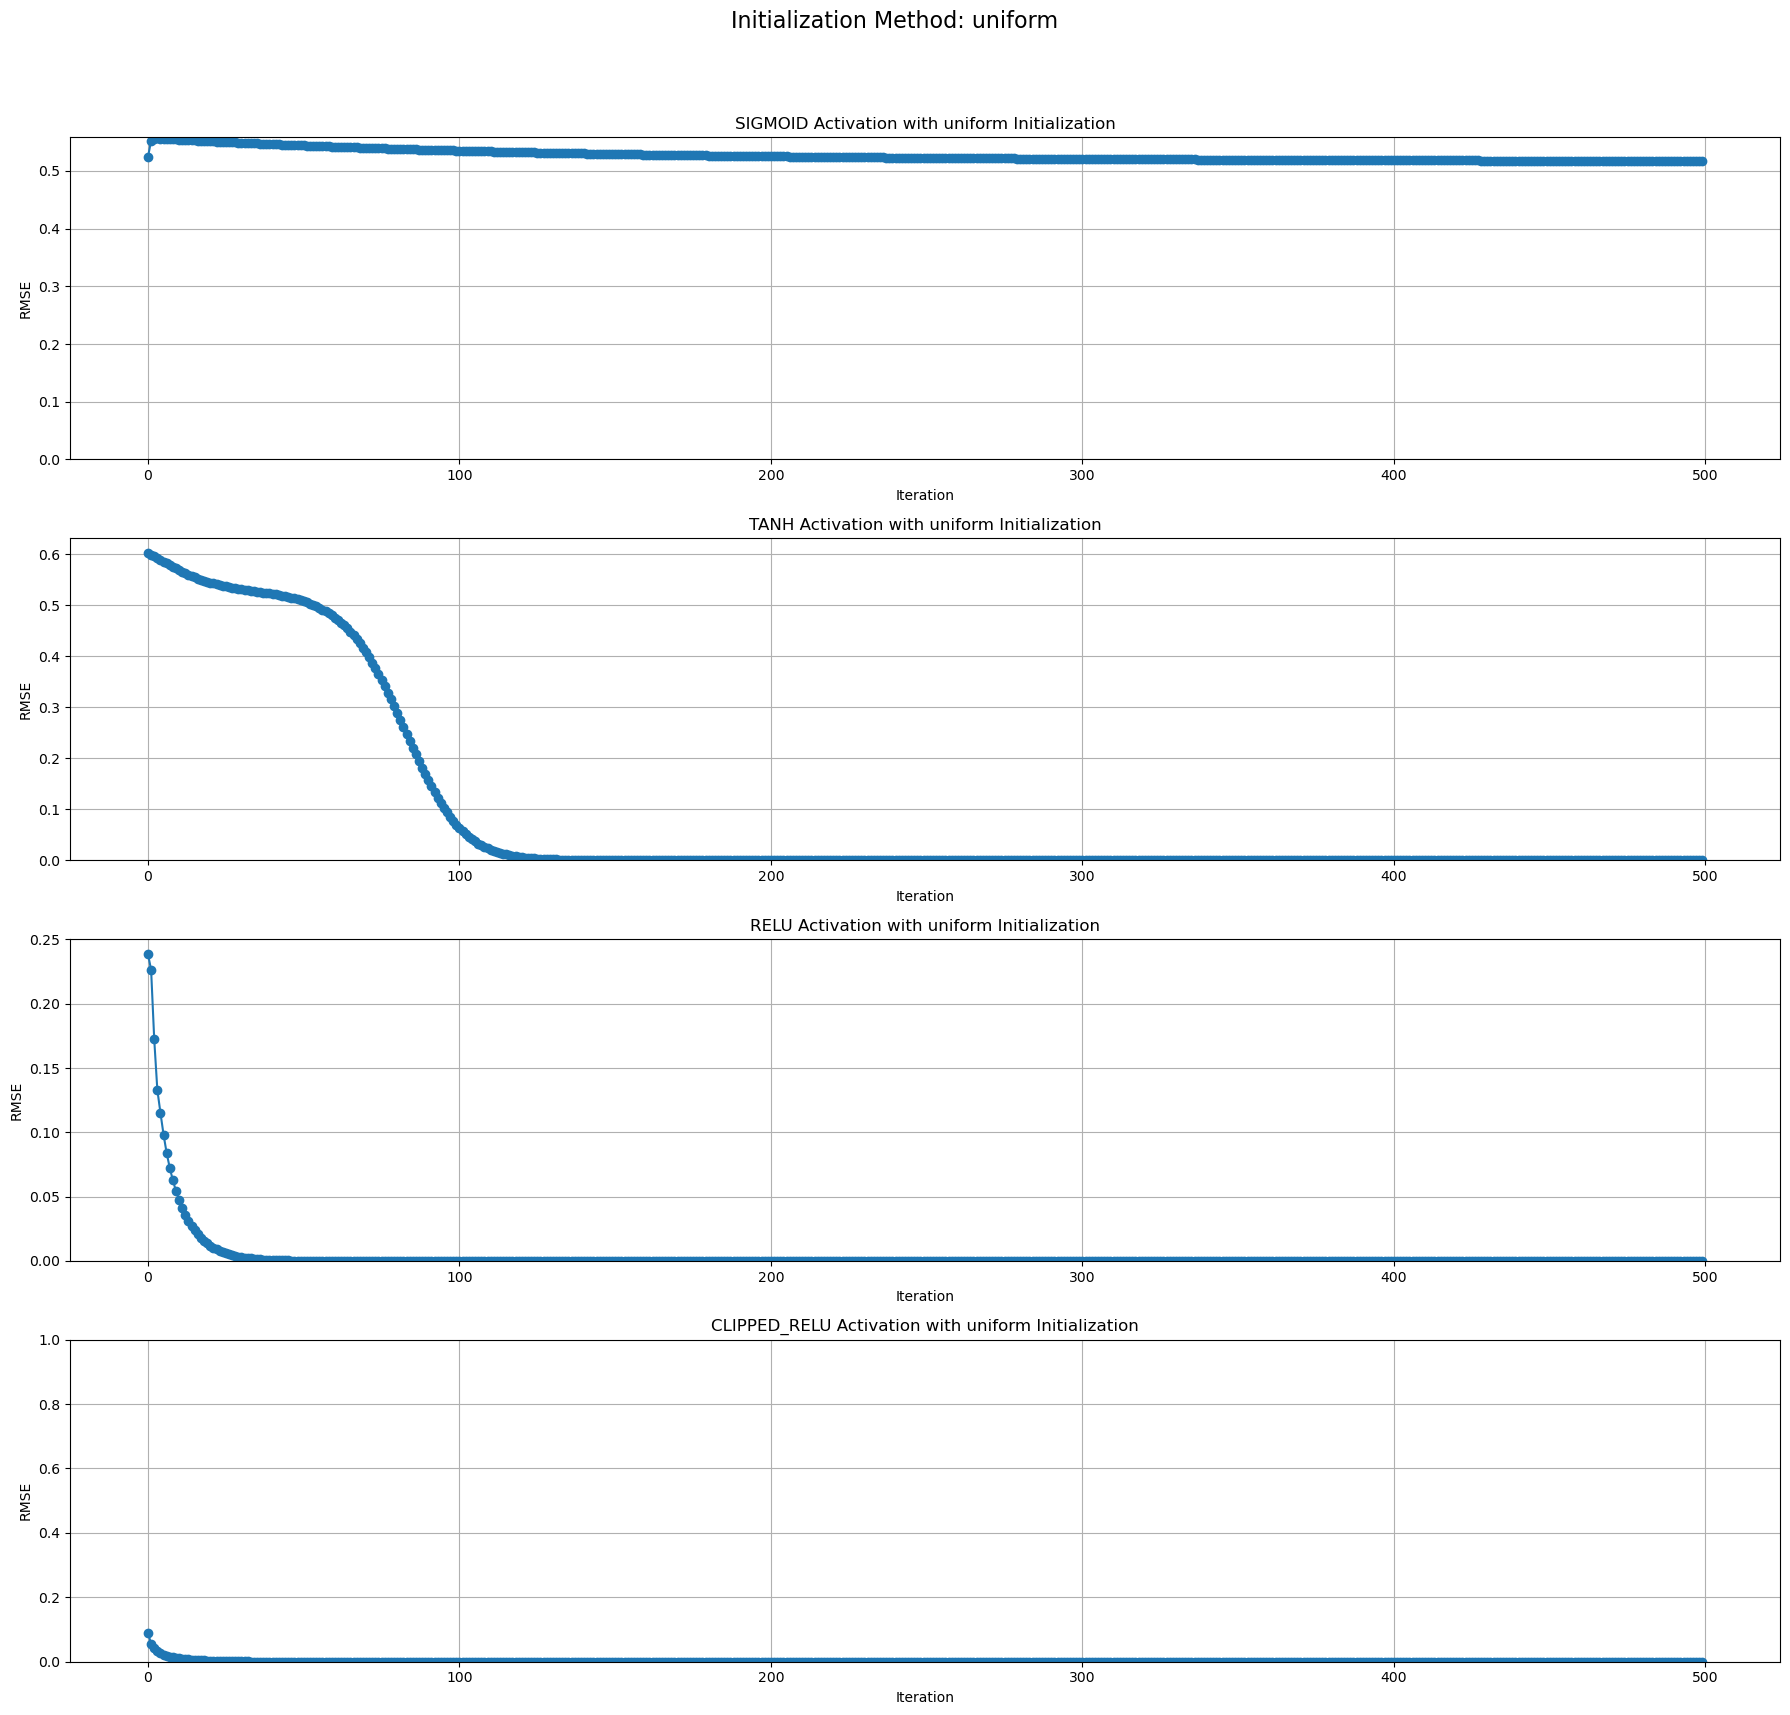

didn't
converged
converged
converged


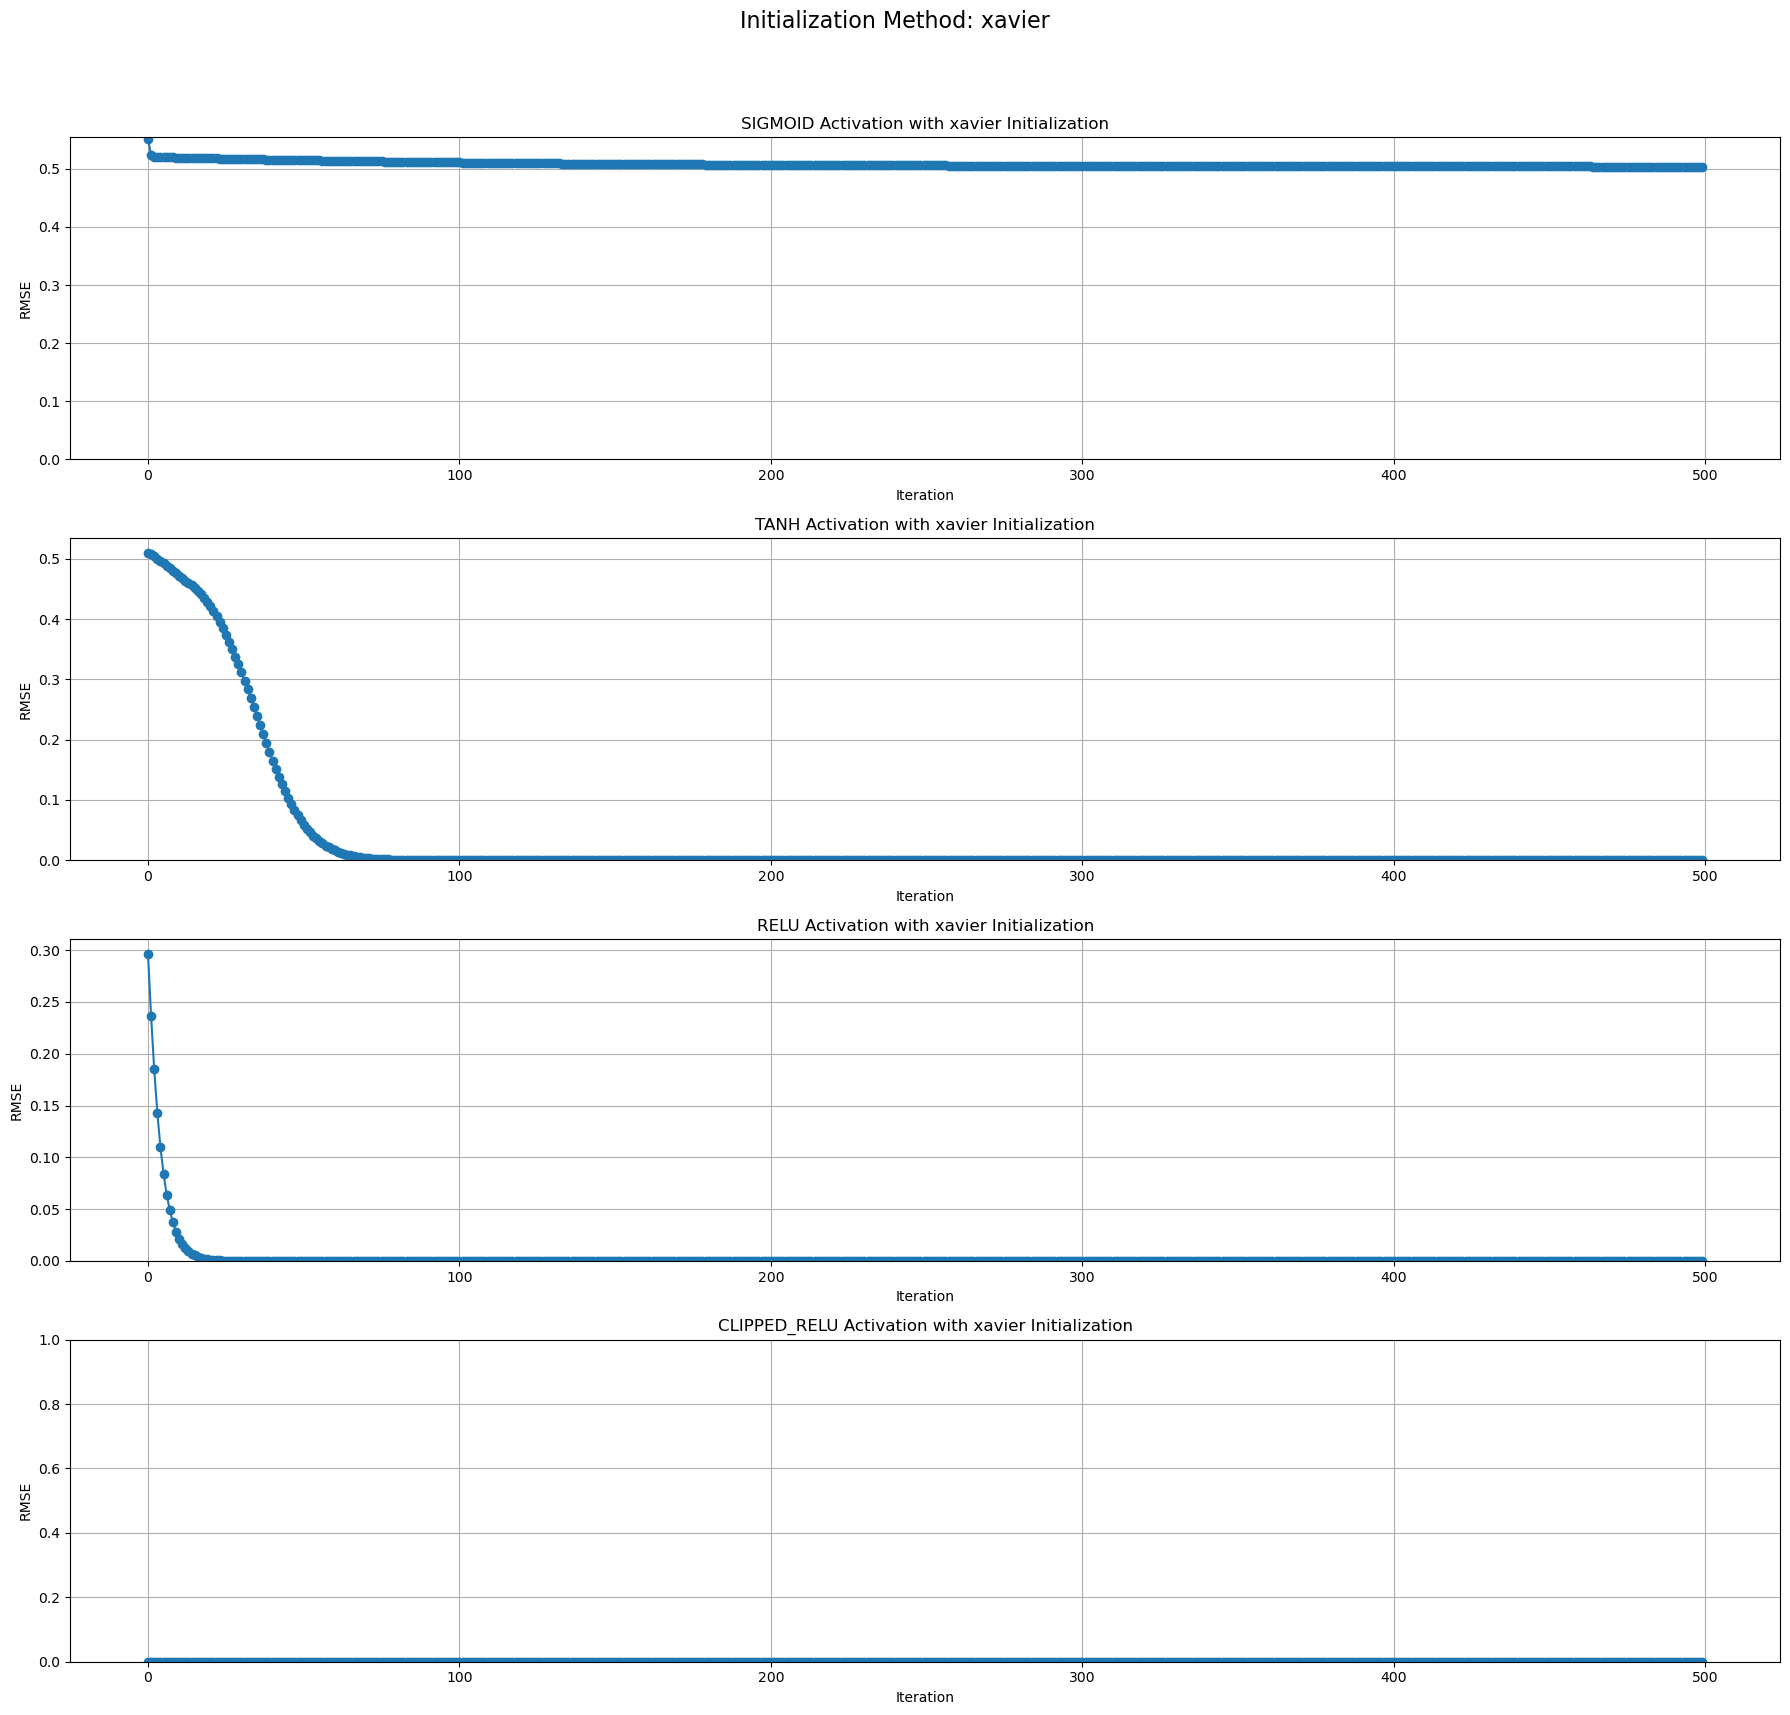

didn't
converged
converged
converged


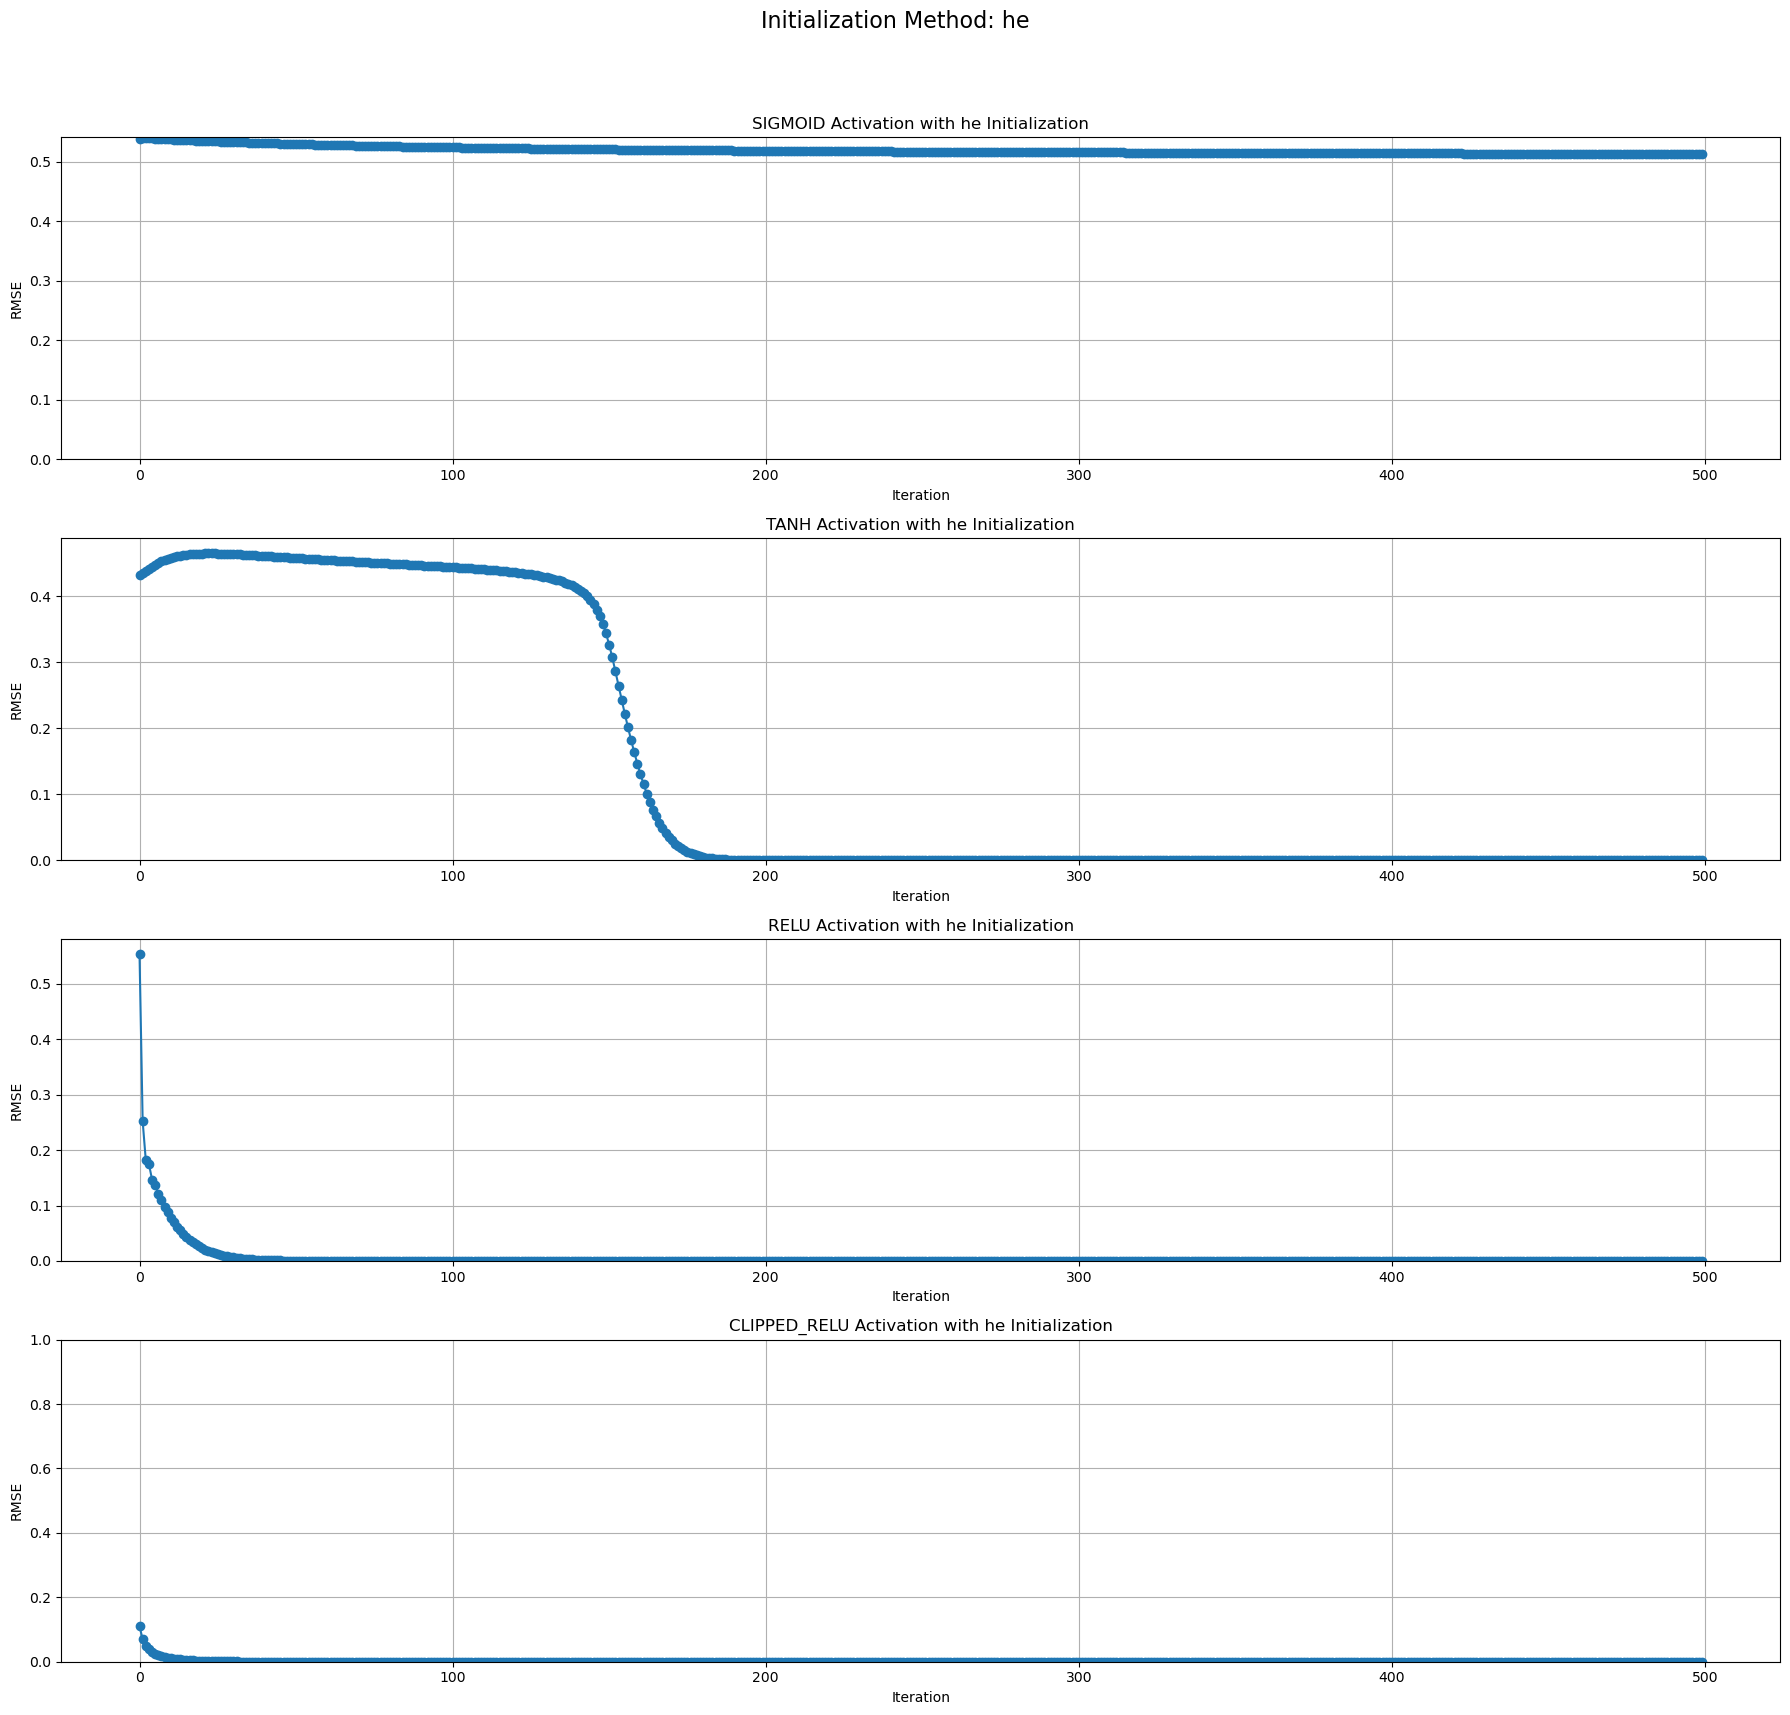

didn't
converged
didn't
didn't


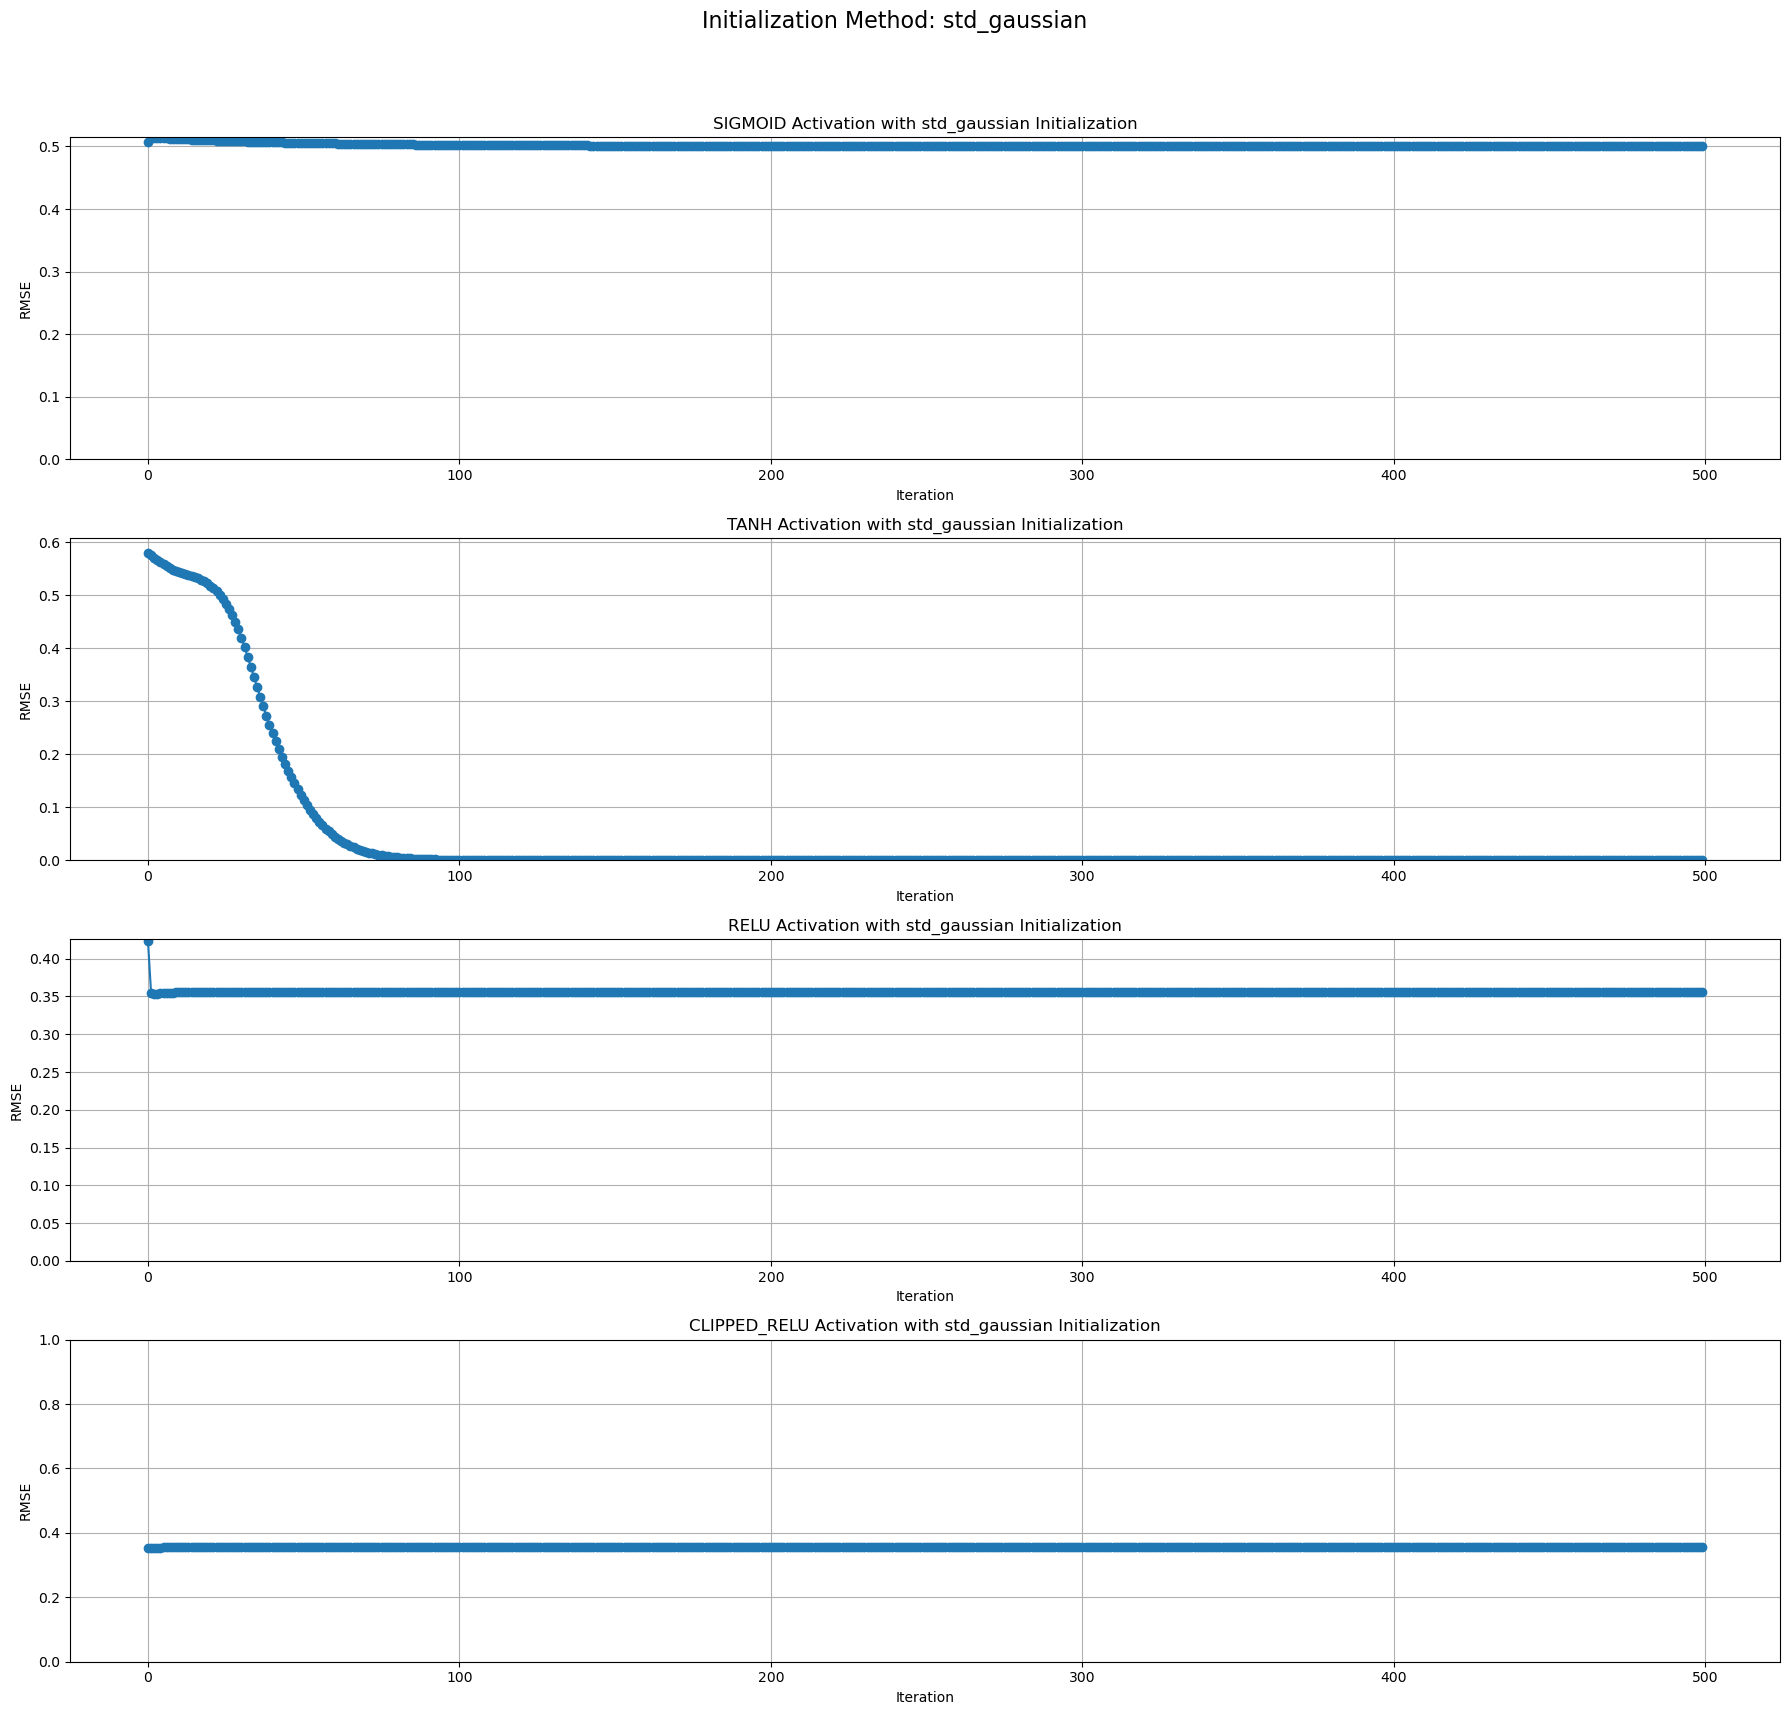

didn't
converged
converged
converged


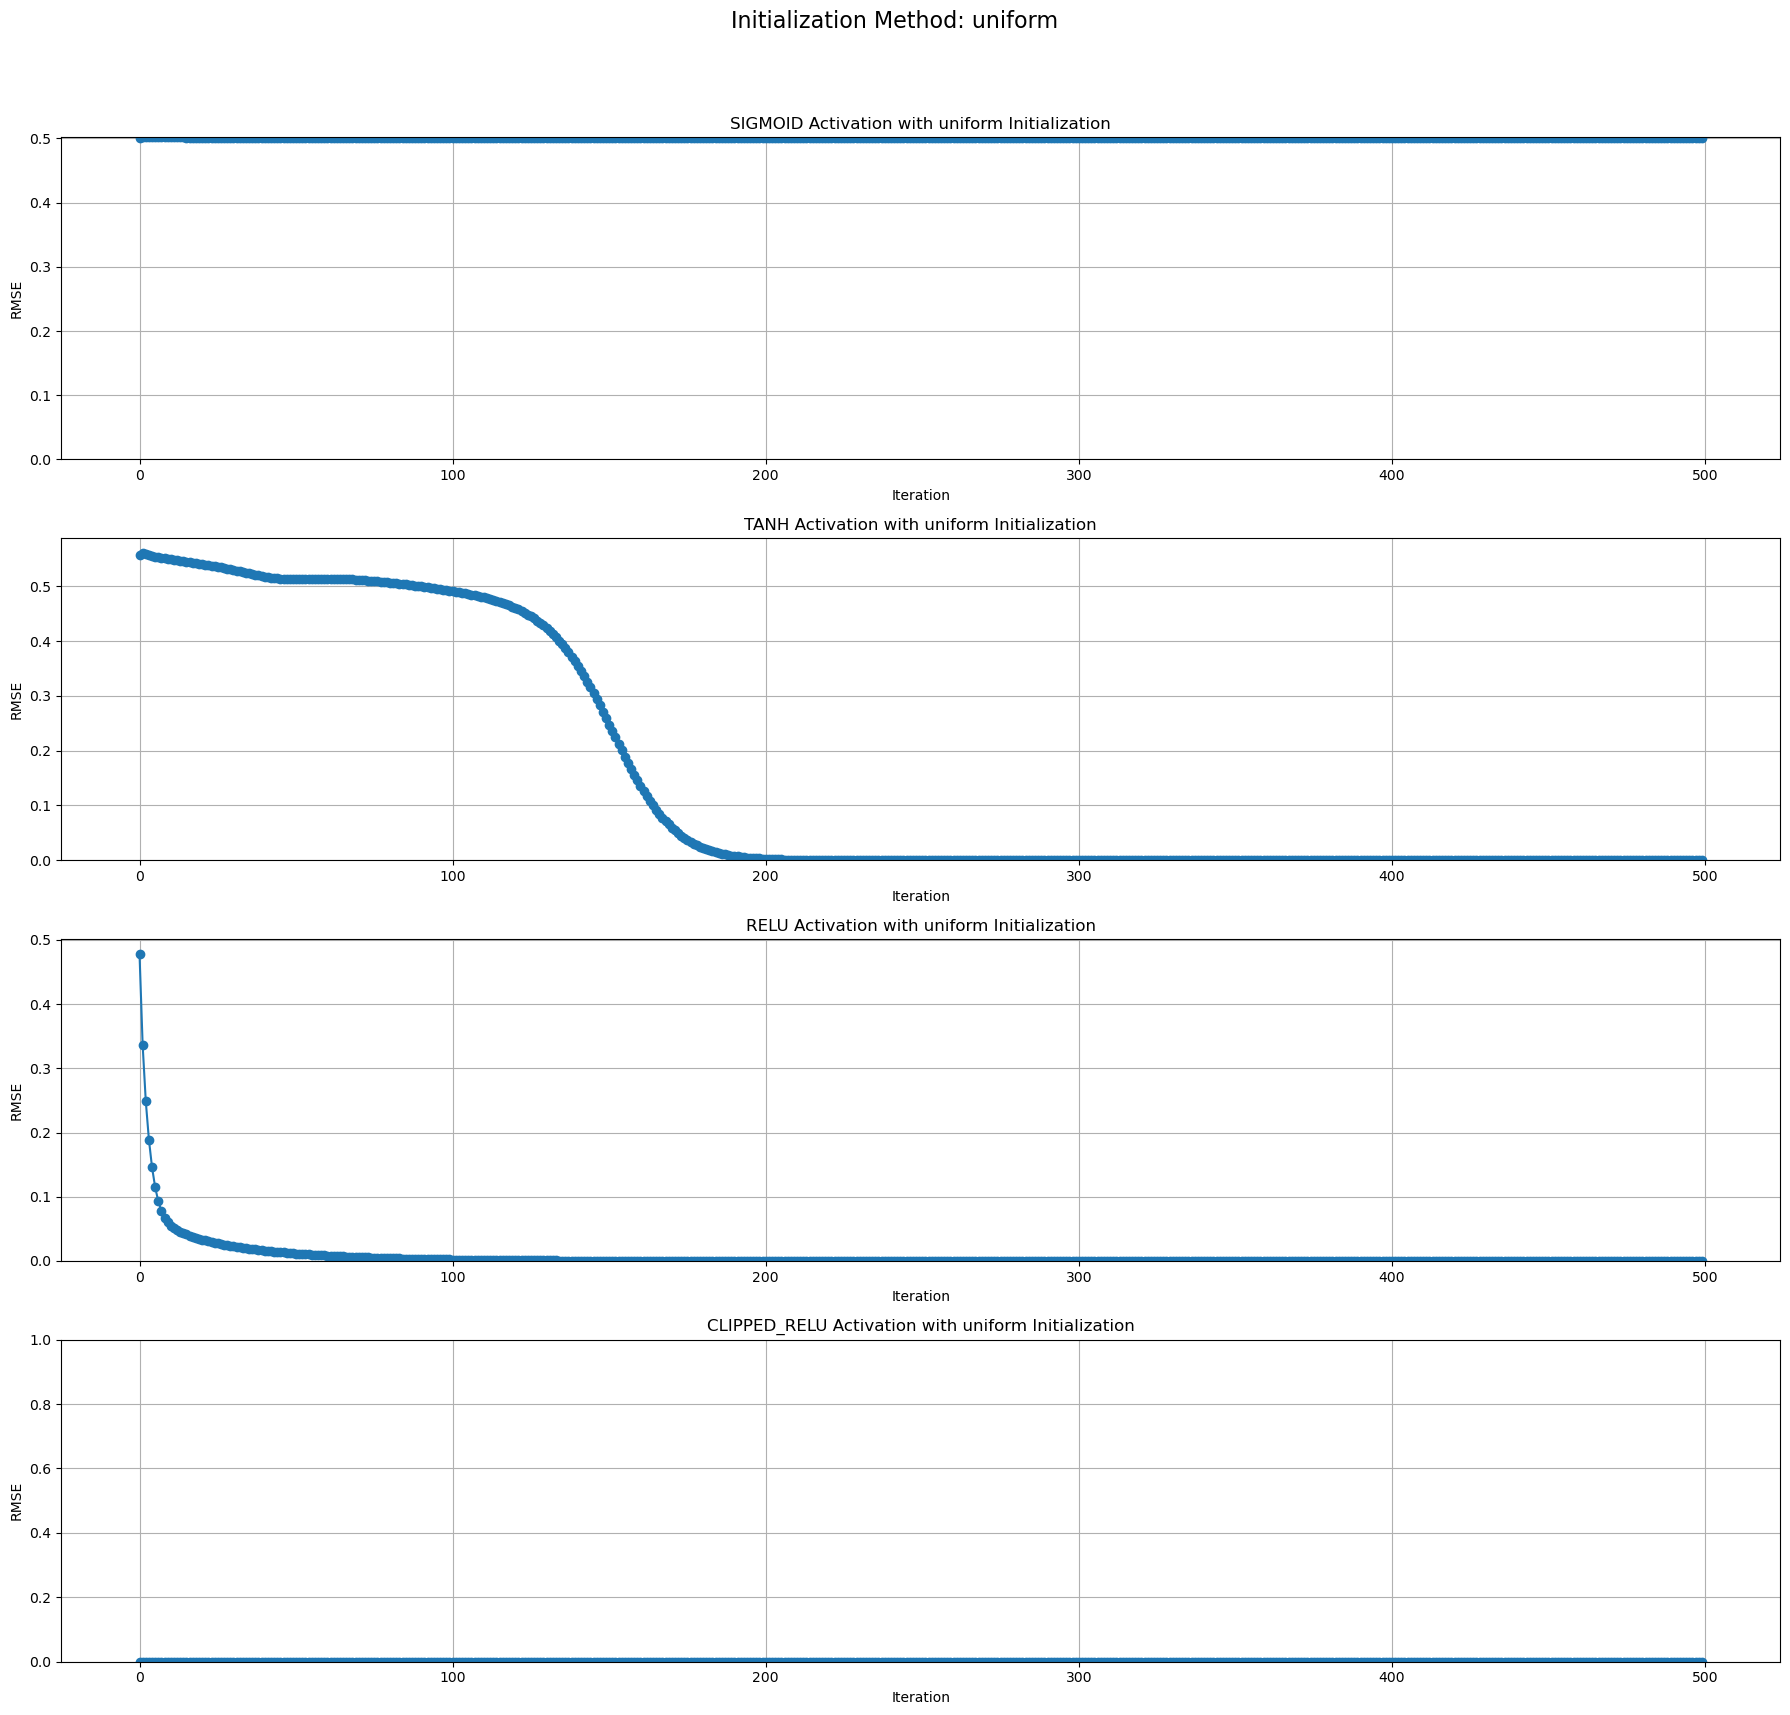

In [8]:
for _ in [0,1,2,3]:
    inits = ["xavier", "he", "std_gaussian", "uniform"]
    activations = ["SIGMOID", "TANH", "RELU", "CLIPPED_RELU"]

    for init_method in inits:
        fig, axs = plt.subplots(len(activations), 1, figsize=(18, 18))
        fig.suptitle(f'Initialization Method: {init_method}', fontsize=16)

        w, b = np_init.initializer(parameters["neurons"], init_method)
        for j, act_type in enumerate(activations):
            np.random.shuffle(indices)
            in_data = in_data[indices]
            out_data = out_data[indices]
            err_arr = []
            parameters["act_type"] = act_type
            for _ in range(500):
                np_learn.learn(in_data, out_data, w, b, parameters)
                predicted = []
                for data in in_data:
                    pred = np_forward.predict(np.array(data), w, b, parameters["n_layers"], parameters["act_type"], parameters["alpha"])
                    predicted.append(pred)

                rmse = np_loss.RMS_error(out_data, np.array(predicted))
                err_arr.append(rmse)

            
            if (err_arr[-1]) <= 0.05:
                print("converged")
            else:
                print("didn't")
            plt.ylim(bottom=0)
            axs[j].plot(err_arr, marker='o', linestyle='-')
            axs[j].set_title(f'{act_type} Activation with {init_method} Initialization')
            axs[j].set_xlabel('Iteration')
            axs[j].set_ylabel('RMSE')
            axs[j].grid(True)
            axs[j].set_ylim(bottom=0)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:
#the clipped relu's convergence is problem specific as XOR is quite conviniatly capped at [0,1] 
#(and I believe that is the same case for why sigmoid doesn't converges)